
# Alzheimer’s and Mild Cognitive Impairment Detection Using fMRI

</br>

Hi, my name is Adi Goldner (313306391), and this work is about taking a step toward improving the early detection of Alzheimer’s disease (AD) and mild cognitive impairment (MCI) using real biological data. Alzheimer’s is a devastating condition, but what if we could catch it earlier, at a stage where interventions might actually make a difference? With this project, I aim to explore how we can better detect MCI and AD using resting-state fMRI (rs-fMRI) data. The goal is to contribute to the development of tools that are more reliable, less dependent on human subjectivity, and capable of identifying these conditions early enough to make a meaningful impact.

</br></br>




## Alzheimer, Mild Cognitive Impairment, and rs-fMRI  
</br>


**Alzheimer’s disease (AD)** is a progressive neurodegenerative disorder that profoundly affects memory, thinking, and behavior. It is the most common cause of dementia, [accounting for 60-80% of dementia cases ]( https://www.alz.org/alzheimers-dementia/difference-between-dementia-and-alzheimer-s ) and impacts millions of people worldwide. According to [Alzheimer’s Disease International](https://www.alzint.org/about/dementia-facts-figures/dementia-statistics/), over 55 million people were living with dementia in 2020. This number is projected to nearly double every 20 years, reaching 78 million in 2030 and 139 million in 2050.

</br></br>

A key challenge in addressing AD is early diagnosis. By the time symptoms become apparent, significant brain damage has often occurred, leaving few, if any, effective intervention options. **Mild Cognitive Impairment (MCI)** represents a transitional stage between healthy aging and AD. Early and accurate diagnosis of MCI can delay or even halt the progression to AD through lifestyle adjustments, medications, or therapies. As such, MCI represents a critical window for intervention and is of particular interest as a classification category.
</br></br>

To this day, distinguishing between healthy controls, MCI, and AD remains a significant challenge. Current diagnostic methods rely heavily on cognitive tests and the subjective evaluations of medical professionals. These assessments can vary between practitioners and are influenced by factors such as expertise, personal biases, and even the patient’s mood or level of cooperation during testing. Biomarkers for AD, such as specific proteins in cerebrospinal fluid or structural brain damage visible in MRI scans, are typically effective only at very late stages of the disease, leaving little to no options for intervention. For MCI, no reliable biomarkers currently exist, further complicating early diagnosis. Finding a way to reliably distinguish between healty aging, MCI, and AD using objective biological data is, therefore, of critical importance.
</br></br>



**Functional Magnetic Resonance Imaging (fMRI)**, and specifically **resting-state fMRI (rs-fMRI)**, offers a promising path forward. Rs-fMRI is a non-invasive imaging technique that measures spontaneous brain activity and captures functional connectivity patterns in the brain. Unlike task-based fMRI, which requires patients to perform specific cognitive tasks, rs-fMRI does not involve active engagement, making it ideal for patients with conditions such as autism, advanced neurodegeneration, or disabilities that may impair the ability to follow instructions or perform tasks. This simplicity not only makes the scanning process more accessible but also streamlines the analysis for researchers.
</br></br>

By measuring activity in the brain’s **default mode network (DMN)**, rs-fMRI provides a concrete, objective biosignal that reflects changes in neural connectivity associated with MCI and AD. If we can leverage this data to classify patients more effectively, we could provide professionals with reliable, data-driven tools to aid in early diagnosis and intervention.
</br></br>

(side note In this notebook, healthy controls will be referred to as cognitive normal (CN).)

<br>


## Goals of this project
</br>

This project aims to improve the classification accuracy of rs-fMRI data for distinguishing CN, MCI, and AD patients. Building on the methodology described in B. Jie, M. Liu, and D. Shen’s study, "Integration of temporal and spatial properties of dynamic connectivity networks for automatic diagnosis of brain disease," it explores how preprocessing methods can influence classification results. While Jie et al.’s study demonstrated the effectiveness of integrating spatial and temporal properties of **dynamic connectivity networks (DCNs)**, it did not investigate the impact of different preprocessing methods on these results.
</br>

By applying multiple preprocessing pipelines, the project strives to achieve better classification performance (e.g., accuracy, sensitivity, specificity) compared to a fixed pipeline. The classification method itself utilizes a **Support Vector Machine (SVM)**, chosen for its ability to effectively handle both spatial and temporal features and other patient information like age and sex, while working on my trusty, well-worn 8-year-old Lenovo ThinkPad, whose keys have seen many seasons come and go.

</br></br>




## Motivation
</br>

By this point, I hope I have convinced you that Alzheimer’s disease (AD) is a first-class, premium, grade-A problem. Finding a more accurate and objective classification system based on biological data could one day provide professionals with robust support for decision-making and potentially enable earlier interventions to slow disease progression. Given the millions of lives affected by AD, this is a worthy endeavor. Furthermore, the choice of resting-state fMRI (rs-fMRI) data as the basis for this biological data is a logical and promising approach for this task.

</br></br>



## A Bit on the Dataset
</br>

If you’ve spent any time reading studies on neuroimaging and Alzheimer’s disease, you’ve probably come across one organization repeatedly: [ADNI](https://adni.loni.usc.edu/about/) (Alzheimer’s Disease Neuroimaging Initiative). As they state themselves, ADNI’s two main goals are: to improve how doctors diagnose patients with Alzheimer’s disease and to provide data to researchers around the world. 

ADNI has collected large amounts of neuroimaging data from numerous studies. It’s important to note that this dataset is not publicly available and requires permission from ADNI to access. You can request access to the dataset [here](https://adni.loni.usc.edu/data-samples/adni-data/). Because neuroimaging data constitutes private medical information, we will ensure that it is fully anonymized throughout this notebook.




Once you’ve gained access to the dataset, you can download the neuroimaging data through their website. This leads me to explain the characteristics of this dataset using images rather than code, so bear with me here as we dive into the scale of this massive operation.

</br></br>

![ANDI dataset statistics](./images/ADNI_STATS.png)


</br></br>

The dataset contains 3,020 subjects who have undergone various neuroimaging scans across different studies, using methods such as MRI, fMRI, and EEG, each with distinct parameters. Today, we are specifically interested in fMRI scans, so let’s take a closer look. We’ll use the ADNI website to search for all the fMRI scans available.

</br></br>

![ADNI fmri search results](./images/search_res.png)



</br></br>

We found 8,093 different examples of fMRI scans. Note that there are only 3,020 subjects, which means a single patient has multiple fMRI scans from different studies.

If we take a look at a random search results page, we see:

</br></br>

![ADNI search page](./images/search_page.png)

</br></br>

The Series Description column represents different protocols used to capture the fMRI data. As we can see, there are many protocols listed. If we were to browse through more pages, we’d find even more protocols. To ensure the scans are consistent, we’ll select one protocol to work with.



</br>

We’ll focus on a subset of scans from the Resting State Series. This choice is based on its size (140 scans per time series), its scope (including a wide range of subjects across male and female groups), and its relevance to our target categories: AD, MCI, and CN .

</br>

I selected a random subset of 20 males and 20 females from each category, resulting in a total of 120 examples (excluding a few files that were corrupted during download) for analysis. While this might seem like a small sample size at first glance, the entire raw dataset I’m working with amounts to 12.2 GB. Preprocessing steps such as realignment, normalization, and the generation of transformation matrices further amplify the data volume. Each step creates additional data. Additionally, we are testing multiple preprocessing pipelines to optimize classification accuracy. This caused my machine to run out of space, forcing me to add a couple of cells to remove files created in the preprocessing pipeline that were no longer needed.

Though the initial number of examples is modest, the sheer volume of data generated during preprocessing underscores the scale of this endeavor. It’s safe to say that my trusty Lenovo ThinkPad has been working overtime, shedding digital blood, sweat, and tears to process this massive dataset.
<br>

After downloading the dataset, I organized it into a folder with the relative path ./DATA/RAW/, which will serve as the base directory for accessing the data throughout this project. To collect and organize the different groups, I created separate collections on the ADNI website. As a result, the folder structure within ./DATA/RAW/ is as follows:

    ./DATA/RAW/AD_FEMALE
    ./DATA/RAW/AD_MALE
    ./DATA/RAW/CN_FEMALE
    ...

We will explore this structure shortly 

## A Final Note Before We Begin

This code utilizes several third-party programs that are not Python libraries, as is customary in neuroimaging analysis. Some of these programs are accessed from Python via the operating system. To ensure that this code runs on your machine, the following tools must be installed:

    dcm2niix: Used to convert DICOM files to NIfTI format. This step is essential for performance reasons, as the dataset is large, and efficient data handling is necessary.
    FSL: A suite of tools for common neuroimaging tasks, which are integral to this analysis.

## As is customary in Jupyter notebooks for data analysis, we will begin with a cell declaring all the imports we will need.


In [2]:
# IMPORTS 
import os
from os.path import abspath, join
from multiprocessing import Process, Queue

import json
import shutil
import random
import subprocess
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import nibabel as nib
from nilearn import plotting, image


from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler, LabelEncoder
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay

from nipype.interfaces.fsl import Info, FLIRT
from nipype.interfaces.fsl import Info, FLIRT

from nipype import Workflow, Node, MapNode, config
from nipype.interfaces.fsl.maths import MathsCommand
from nipype.interfaces.fsl.utils import ImageMeants
from nipype.interfaces.fsl.maths import MathsCommand
from nipype.interfaces.utility   import IdentityInterface
from nipype.interfaces.fsl import MCFLIRT, FLIRT, FNIRT, Info, ApplyXFM, ExtractROI, Merge, BET, BET, FilterRegressor

from IPython.display import HTML


## And for convenience’s sake,

we will declare and create all the folders we are going to use now. It may be less traditional, but it saves a lot of headaches in the long run.

In [3]:
# CONSTANTS 
DICOM_BASE_DIR = abspath("./DATA/RAW")
PIPELINES_DIR = abspath("./DATA/pipelines")
BASE_PIPELINE_DIR = join(PIPELINES_DIR, "base")
DICOM_BASE_DIR = abspath("./DATA/RAW/")
NII_BASE_DIR = join(BASE_PIPELINE_DIR, "nii")

BET_BASE_DIR = abspath("./DATA/pipelines/base/bet/")
BET_MASKS_DIR = join(BET_BASE_DIR, "masks/")
BET_MEAN_DIR = join(BET_BASE_DIR , "mean/")


BET_4D_OUT_DIR = join(BET_BASE_DIR, "4D")

REALIGN_BASE_DIR = abspath("./DATA/pipelines/base/realign")
BASE_PIPELINE_DIR = abspath("./DATA/pipelines/base/")
BASE_PIPELINE_NORMALIZED_BASE_DIR = join(BASE_PIPELINE_DIR, "normalized")
BASE_PIPELINE_NORMALIZED_MEAN_IMAGES_DIR = join(BASE_PIPELINE_NORMALIZED_BASE_DIR, "mean_images")
BASE_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR = join(BASE_PIPELINE_NORMALIZED_BASE_DIR, "affine_matrices")
BASE_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR = join(BASE_PIPELINE_NORMALIZED_BASE_DIR, "registered_mean")
BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR = join(BASE_PIPELINE_NORMALIZED_BASE_DIR, "outputs")

# For convineince I stored a copy of the atlases in the following relative diractory 
MNI_ATLAS_IMG_PATH = abspath("./atlas/MNI-maxprob-thr25-2mm.nii.gz") 
HARVARD_OXFORD_ATLAS_IMG_PATH = abspath("./atlas/HarvardOxford-cort-maxprob-thr0-2mm.nii.gz")
MNI_ATLAS_IMG_PATH = abspath(MNI_ATLAS_IMG_PATH)

BASE_PIPELINE_MNI_BASE_DIR = join(BASE_PIPELINE_NORMALIZED_BASE_DIR,"mni" )
BASE_MNI_ROI_EXTRACTION_DIR = join(BASE_PIPELINE_MNI_BASE_DIR, "roi_extraction")
BASE_MNI_DCN_DIR = join(BASE_PIPELINE_MNI_BASE_DIR, "DCN")
BASE_PIPELINE_HARVARD_OXFORD_BASE_DIR = join(BASE_PIPELINE_NORMALIZED_BASE_DIR,"harverd_oxford" )
BASE_HARVARD_OXFORD_ROI_EXTRACTION_DIR = join(BASE_PIPELINE_HARVARD_OXFORD_BASE_DIR, "roi_extraction")
BASE_HARVARD_OXFORD_DCN_DIR = join(BASE_PIPELINE_HARVARD_OXFORD_BASE_DIR, "DCN")

MC_PIPELINE_BASE_DIR = join(BASE_PIPELINE_DIR, "mc")
MC_PIPELINE_MC_DIR = join(MC_PIPELINE_BASE_DIR, "mc")
MC_PIPELINE_MNI_ATLAS_DIR = join(MC_PIPELINE_BASE_DIR, "mni")
MC_PIPELINE_HO_ATLAS_DIR = join(MC_PIPELINE_BASE_DIR, "HO")

MC_PIPELINE_NORMALIZED_BASE_DIR = join(MC_PIPELINE_BASE_DIR, "normalized")
MC_PIPELINE_NORMALIZED_MEAN_IMAGES_DIR = join(MC_PIPELINE_NORMALIZED_BASE_DIR, "mean_images")
MC_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR = join(MC_PIPELINE_NORMALIZED_BASE_DIR, "affine_matrices")
MC_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR = join(MC_PIPELINE_NORMALIZED_BASE_DIR, "registered_mean")
MC_PIPELINE_NORMALIZED_OUTPUTS_DIR = join(MC_PIPELINE_NORMALIZED_BASE_DIR, "outputs")

MC_MNI_ROI_EXTRACTION_DIR = join(MC_PIPELINE_MNI_ATLAS_DIR, "roi_extraction")
MC_MNI_DCN_DIR = join(MC_PIPELINE_MNI_ATLAS_DIR, "DCN")
MC_HARVARD_OXFORD_ROI_EXTRACTION_DIR = join(MC_PIPELINE_HO_ATLAS_DIR, "roi_extraction")
MC_HARVARD_OXFORD_DCN_DIR = join(MC_PIPELINE_HO_ATLAS_DIR, "DCN")


# create dirs
os.makedirs(BET_4D_OUT_DIR, exist_ok=True)
os.makedirs(REALIGN_BASE_DIR, exist_ok=True)
os.makedirs( BASE_PIPELINE_NORMALIZED_BASE_DIR, exist_ok= True)
os.makedirs( BASE_PIPELINE_NORMALIZED_MEAN_IMAGES_DIR, exist_ok= True)
os.makedirs( BASE_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR, exist_ok= True)
os.makedirs( BASE_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR, exist_ok= True)
os.makedirs( BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR, exist_ok= True)

os.makedirs( MC_MNI_ROI_EXTRACTION_DIR, exist_ok= True)
os.makedirs( MC_MNI_DCN_DIR, exist_ok= True)
os.makedirs( MC_HARVARD_OXFORD_ROI_EXTRACTION_DIR, exist_ok= True)
os.makedirs( MC_HARVARD_OXFORD_DCN_DIR, exist_ok= True)

os.makedirs( MC_PIPELINE_NORMALIZED_BASE_DIR, exist_ok= True)
os.makedirs( MC_PIPELINE_NORMALIZED_MEAN_IMAGES_DIR, exist_ok= True)
os.makedirs( MC_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR, exist_ok= True)
os.makedirs( MC_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR, exist_ok= True)
os.makedirs( MC_PIPELINE_NORMALIZED_OUTPUTS_DIR, exist_ok= True)

os.makedirs(BET_BASE_DIR, exist_ok=True)
os.makedirs(BET_MASKS_DIR, exist_ok=True)
os.makedirs(BET_MEAN_DIR, exist_ok=True)
os.makedirs(MC_PIPELINE_BASE_DIR, exist_ok=True)
os.makedirs(MC_PIPELINE_MC_DIR, exist_ok=True)
os.makedirs(MC_PIPELINE_MNI_ATLAS_DIR, exist_ok=True)
os.makedirs(MC_PIPELINE_HO_ATLAS_DIR, exist_ok=True)


<br>

Now, let us begin our exploration by examining the structure of the `./DATA/RAW` folder, so we can better understand how the data is organized.

<br>

In [4]:

def list_files_and_folders(directory):
    files = []
    folders = []
    
    for entry in os.listdir(directory):
        path = os.path.join(directory, entry)
        if os.path.isfile(path):
            files.append(entry)
        elif os.path.isdir(path):
            folders.append(entry)
    
    print("Files:", files)
    print("Folders:", folders)
    return files, folders

_ = list_files_and_folders("./DATA/RAW")


Files: []
Folders: ['MCI_male', 'AD_male', 'MCI_female', 'CN_female', 'CN_male', 'AD_female']


<br>

Here, we notice that the data is neatly divided into six collections. Let us take a closer look at one of these folders to examine its structure.


In [5]:
_example_files, _example_folders = list_files_and_folders("./DATA/RAW/MCI_male")

Files: ['data.csv', 'MCI_MALE_1_10_2025.csv']
Folders: ['I305240', 'I323338', 'I358424', 'I287274', 'I296652', 'I332859', 'I375664', 'I354814', 'I227595', 'I274147', 'I303731', 'I376286', 'I257477', 'I323324', 'I292427', 'I311921', 'I267490', 'I283879']


<br>

The folder contains subfolders, each with what appears to be an index, along with a single CSV file. Let’s examine the contents of this CSV file to uncover more details about the data.



In [6]:

MCI_male_df = pd.read_csv(os.path.join("./DATA/RAW/MCI_male/", _example_files[0]))
MCI_male_df.head()


Image Data ID     Subject Group Sex  Age Visit Modality         Description  \
0       I375664  100_S_4556   MCI   M   74   v11     fMRI  Resting State fMRI   
1       I303731  006_S_4713   MCI   M   71   v02     fMRI  Resting State fMRI   
2       I323338  006_S_4713   MCI   M   71   v04     fMRI  Resting State fMRI   
3       I376286  006_S_4713   MCI   M   72   v11     fMRI  Resting State fMRI   
4       I323324  006_S_4713   MCI   M   71   v04     fMRI  Resting State fMRI   

       Type   Acq Date Format  Downloaded  
0  Original  6/06/2013    DCM         NaN  
1  Original  5/14/2012    DCM         NaN  
2  Original  8/13/2012    DCM         NaN  
3  Original  6/12/2013    DCM         NaN  
4  Original  8/13/2012    DCM         NaN

<br>

Our suspicions were correct. The folder names match the values in the "Image Data ID" column. The CSV also contains additional information, such as **Subject ID**, which repeats across entries. This aligns with our earlier discussion about the **ADNI** dataset, which includes 3,020 patients but 8,093 scans. Many patients were scanned multiple times. In most cases, this will not be an issue since Alzheimer’s and MCI are progressive diseases. Having multiple scans from the same individual at different stages of the disease is valuable, even if the diagnosis remains the same (AD, MCI, or CN). However, we notice two images with different Image Data IDs, **I323324** and **I323338**, belonging to the same subject, from the same visit, and on the same day. Let’s take a closer look at them.


In [7]:

selected_rows = MCI_male_df[MCI_male_df['Image Data ID'].isin(['I323324', 'I323338'])]
selected_rows


Image Data ID     Subject Group Sex  Age Visit Modality         Description  \
2       I323338  006_S_4713   MCI   M   71   v04     fMRI  Resting State fMRI   
4       I323324  006_S_4713   MCI   M   71   v04     fMRI  Resting State fMRI   

       Type   Acq Date Format  Downloaded  
2  Original  8/13/2012    DCM         NaN  
4  Original  8/13/2012    DCM         NaN

<br>

We will assume that multiple scans of the same patient taken on the same day do not provide additional valuable information about the disease and may instead introduce bias into the dataset. This is especially important given that the number of examples is relatively small, despite the large dataset size.

Therefore, we will retain scans from the same patient taken on different dates, but consider scans taken on the same day to be redundant, removing one to reduce potential bias.

Before proceeding with duplicate removal, it’s essential to note that this is just one of six CSV files, each corresponding to a different collection. As a first step, we’ll combine all six files into a single, comprehensive CSV and then analyze the data as a whole.


In [8]:

def combine_csvs(base_dir):
    combined_data = []
    # Traverse through subdirectories
    for subdir, _, files in os.walk(base_dir):
        for file in files:
            # Process only CSV files
            if file.endswith('.csv'):  
                # Combine all csvs togther into a list of pandas dataframe  
                file_path = os.path.join(subdir, file)
                df = pd.read_csv(file_path)
                combined_data.append(df)

    # Combine all data into a single DataFrame    
    return pd.concat(combined_data, ignore_index=True)



In [9]:

df = combine_csvs(DICOM_BASE_DIR)
rows_in_df = df.shape[0]
print(f" number of rows in data frame = {rows_in_df}")
df.head()

 number of rows in data frame = 152


Image Data ID     Subject Group Sex  Age Visit Modality         Description  \
0       I375664  100_S_4556   MCI   M   74   v11     fMRI  Resting State fMRI   
1       I303731  006_S_4713   MCI   M   71   v02     fMRI  Resting State fMRI   
2       I323338  006_S_4713   MCI   M   71   v04     fMRI  Resting State fMRI   
3       I376286  006_S_4713   MCI   M   72   v11     fMRI  Resting State fMRI   
4       I323324  006_S_4713   MCI   M   71   v04     fMRI  Resting State fMRI   

       Type   Acq Date Format Downloaded  
0  Original  6/06/2013    DCM        NaN  
1  Original  5/14/2012    DCM        NaN  
2  Original  8/13/2012    DCM        NaN  
3  Original  6/12/2013    DCM        NaN  
4  Original  8/13/2012    DCM        NaN

<br>  
Now that we have merged the data into a single CSV file, we can begin the cleaning process.  
As discussed earlier, our first step will be to remove all scans that share the same subject ID and acquisition date.


In [10]:

df = df.drop_duplicates(subset=['Subject', 'Acq Date'])
print(f" number of rows droped = {rows_in_df - df.shape[0]}")
print(f" number of rows now  = {df.shape[0]}")


 number of rows droped = 46
 number of rows now  = 106


In [11]:

df.head()


Image Data ID     Subject Group Sex  Age Visit Modality  \
0        I375664  100_S_4556   MCI   M   74   v11     fMRI   
1        I303731  006_S_4713   MCI   M   71   v02     fMRI   
2        I323338  006_S_4713   MCI   M   71   v04     fMRI   
3        I376286  006_S_4713   MCI   M   72   v11     fMRI   
10       I311921  002_S_4799  EMCI   M   68   v02     fMRI   

           Description      Type   Acq Date Format Downloaded  
0   Resting State fMRI  Original  6/06/2013    DCM        NaN  
1   Resting State fMRI  Original  5/14/2012    DCM        NaN  
2   Resting State fMRI  Original  8/13/2012    DCM        NaN  
3   Resting State fMRI  Original  6/12/2013    DCM        NaN  
10  Resting State fMRI  Original  6/21/2012    DCM  1/10/2025

Now that we have removed duplicates, we can eliminate additional columns that do not contribute relevant information to our analysis:

- **'Subject' and 'Acq Date':** These are no longer necessary because each scan is now treated as a distinct example. Subject ID and acquisition date no longer provide meaningful differentiation.  
- **'Visit':** The number of clinic visits does not influence the progression of Alzheimer's in the brain, so this column can also be safely dropped.  
- **'Downloaded':** This column is redundant since we already have the data. Even though it contains NaN values, it does not add any value to our analysis.  

Given the above, we can confidently remove these columns to streamline our dataset.



In [12]:

df = df.drop(columns=["Subject","Visit", "Acq Date", "Downloaded"])
df.head()


Image Data ID Group Sex  Age Modality         Description      Type Format
0        I375664   MCI   M   74     fMRI  Resting State fMRI  Original    DCM
1        I303731   MCI   M   71     fMRI  Resting State fMRI  Original    DCM
2        I323338   MCI   M   71     fMRI  Resting State fMRI  Original    DCM
3        I376286   MCI   M   72     fMRI  Resting State fMRI  Original    DCM
10       I311921  EMCI   M   68     fMRI  Resting State fMRI  Original    DCM

Now, let's check the data to make sure it’s as expected. We should only have fMRI data, specifically resting-state fMRI. Let’s verify that the following columns contain the correct values:

- **'Modality' column:** Should only contain "fMRI".
- **'Description' column:** Should only contain "Resting State fMRI".
- **'Type' column:** Should only contain "Original", indicating the data hasn't undergone preprocessing yet.
- **'Format' column:** Should reflect the formats of the fMRI scans (e.g., NIfTI, DICOM) to ensure we’re working with the correct file types.

By checking these columns, we ensure the data is consistent and relevant for our analysis.


In [13]:
 
print( f" unique values in Modality column : {df['Modality'].unique()}" )
print( f" unique values in Description column : {df['Description'].unique()}")
print( f" unique values in Type column : {df['Type'].unique()}" )
print( f" unique values in Format column : {df['Format'].unique()}")


 unique values in Modality column : ['fMRI']
 unique values in Description column : ['Resting State fMRI']
 unique values in Type column : ['Original']
 unique values in Format column : ['DCM']


<br>

As we can see, all of these columns contain only a single unique value, meaning our data is consistent: it’s fMRI data taken from a resting-state fMRI experiment, it’s the original data (not processed), and its format is DCM. Since we've confirmed this, there's no need to keep these columns in the CSV, as they no longer add relevant information. Let’s go ahead and remove them to reduce clutter.


In [14]:

df = df.drop(columns=["Modality","Description", "Type", "Format"])
df.head()


Image Data ID Group Sex  Age
0        I375664   MCI   M   74
1        I303731   MCI   M   71
2        I323338   MCI   M   71
3        I376286   MCI   M   72
10       I311921  EMCI   M   68

So, this is what we’re left with: only the important data. The **Group** column gives us the label for each data point, the **Image Data ID** column references the image scan and its corresponding data in the CSV, and the **Age** and **Sex** columns, while not strictly necessary, provide additional information. We’d like to keep them and see if adding them to the SVM model later makes any difference.

Now, let’s make sure that all the values in these columns are as expected, no unexpected or junk values that we don’t know how to handle. To do that, we’ll again check the unique values of each column. We’ve already checked the **Image Data ID** column, so now let’s look at the remaining three: **Group** and **Sex**, as they contain similar types of data.


In [15]:

print( f" unique values in Group column : {df['Group'].unique()}" )
print( f" unique values in Sex column : {df['Sex'].unique()}")


 unique values in Group column : ['MCI' 'EMCI' 'LMCI' 'AD' 'CN']
 unique values in Sex column : ['M' 'F']


<br>

As expected, the **Sex** column contains only two unique values: "M" and "F," which means everything is good there. However, as we can see in the **Group** column, we have more values than we bargained for. We intended to differentiate between three categories: **AD** (Alzheimer's), **MCI** (Mild Cognitive Impairment), and **CN** (Control), but we’ve encountered two additional values: **LMCI** and **EMCI**, which stand for Late MCI and Early MCI, respectively. These refer to different stages in the progression of MCI to Alzheimer’s.

Distinguishing between Late MCI, Early MCI, and general MCI isn’t part of our current plan. At the moment, we’re focused on providing a more general diagnosis of MCI versus Alzheimer’s. The finer details of Late and Early MCI could be interesting to explore later, perhaps with more examples and stronger computational resources. For now, we’ll treat both LMCI and EMCI as a single category, **MCI**, since they are both types of MCI, as their names suggest. Thus, we will combine these into a single value, **MCI**.


In [16]:

df['Group'] = df['Group'].replace({'EMCI': 'MCI', 'LMCI': 'MCI'})
print( f" unique values in Group column : {df['Group'].unique()}" )


 unique values in Group column : ['MCI' 'AD' 'CN']


<br>
And now, finally, the last column: the **Age** column. Let us check that all is well within the Age column, meaning it does not contain any strange or missing values (such as NaN) or ages that are less than believable.


In [17]:

# Check for NaN values in the 'age' column
has_nan = df['Age'].isna().any()
print(f"Contains NaN values: {has_nan}")

# Check all values are integers
are_all_integers = df['Age'].dropna().apply(lambda x: isinstance(x, int)).all()
print(f"All values are integers: {are_all_integers}")

if not has_nan:
    # Get the range ages
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    print(f"Range of age: {min_age} to {max_age}")
else:
    print("The 'Age' column contains NaN values.")
    

Contains NaN values: False
All values are integers: True
Range of age: 56 to 96


<br>
So, as we can see, there are no NaN values, all the values in the column are integers, and the range of ages in the age column seems reasonable. 

That, ladies and gentlemen, was only the CSV. We haven't yet inspected the fMRI data at all. But now that we have a clean CSV to reference our fMRI scans and their corresponding labels, we can now start addressing the fMRI scans.

As we saw earlier, all the scans in this database are DICOM files. In order to more easily work with the data, we will first convert it to an easier-to-work-with format, which is NIfTI.

We will use **dcm2niix**, which isn't a Python program, so we will access it from the OS using Python, of course.

*Esteemed company* who wish to execute this code must install **dcm2niix**; otherwise, this will not work.


In [18]:

def convert_all_dicoms(dicom_base_dir, output_base_dir, allowed_folders):
    """
    Convert DICOM files to NIfTI format using dcm2niix, but only for folders specified in allowed_folders.
    """
    os.makedirs(output_base_dir, exist_ok=True)
    index = 0

    for curr_path, dirs, files in os.walk(dicom_base_dir):
        # Get the last folder name from the current path
        folder_name = os.path.basename(curr_path)

        # Check if this folder is in the allowed_folders
        if folder_name in allowed_folders and any(file.lower().endswith('.dcm') for file in files):
            index += 1
            output_dir = os.path.join(output_base_dir, str(index))
            os.makedirs(output_dir, exist_ok=True)

            # Convert using dcm2niix and set the output file name
            print(f"Converting: {curr_path}")
            command = ['dcm2niix', '-f', folder_name, '-o', output_dir, curr_path]
            subprocess.run(command, check=True)

    print("\n\nConverted all specified DICOM files to NIfTI format.\n\n")



In [19]:

allowed_folders = set(df["Image Data ID"].astype(str)) 
convert_all_dicoms(DICOM_BASE_DIR, NII_BASE_DIR, allowed_folders)


Converting: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/RAW/MCI_male/I305240
Chris Rorden's dcm2niiX version v1.0.20240202  GCC12.3.0 x86-64 (64-bit Linux)
Found 6720 DICOM file(s)
::autoBids:Philips pulseSeq:'' scanSeq:'GR' seqVariant:'SK'
Philips Scaling Values RS:RI:SS = 1.22589:0:0.00044106 (see PMC3998685)
Convert 6720 DICOM as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/nii/1/I305240 (64x64x48x140)
Conversion required 5.407371 seconds (4.258935 for core code).
Converting: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/RAW/MCI_male/I323338
Chris Rorden's dcm2niiX version v1.0.20240202  GCC12.3.0 x86-64 (64-bit Linux)
Found 6720 DICOM file(s)
::autoBids:Philips pulseSeq:'' scanSeq:'GR' seqVariant:'SK'
Philips Scaling Values RS:RI:SS = 1.22222:0:0.00526108 (see PMC3998685)
Convert 6720 DICOM as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/nii/2/I323338 (64x64x48x140)
Conversion required 4.489731 seconds (3.322562 for 

<br>  
Some explanation of the previous two cells might be in order. We converted all the remaining fMRI scans, those that are still listed in the cleaned CSV file, from the DICOM format to the NIfTI format. The resulting NIfTI files have been stored in a new folder, referenced in the code as **NII_BASE_DIR**.

Within this directory, you'll find several subfolders, each numbered accordingly. These subfolders hold the converted NIfTI files. Let’s take a moment to examine them and confirm that the conversion process was successful and the files are properly organized.


In [20]:

_,_ = list_files_and_folders(NII_BASE_DIR)


Files: []
Folders: ['15', '26', '44', '13', '75', '30', '23', '98', '64', '40', '33', '43', '50', '5', '3', '74', '91', '79', '94', '17', '95', '53', '4', '72', '82', '41', '39', '85', '92', '97', '71', '87', '59', '62', '18', '57', '47', '34', '51', '2', '86', '46', '60', '14', '28', '81', '27', '6', '90', '31', '9', '22', '12', '35', '55', '45', '56', '69', '73', '24', '25', '84', '48', '37', '66', '89', '77', '83', '8', '10', '32', '80', '7', '99', '52', '11', '78', '88', '76', '38', '70', '61', '101', '36', '63', '93', '1', '21', '58', '100', '67', '16', '49', '19', '68', '96', '65', '20', '42', '29', '54']


<br>  
As we can see, the **NII_BASE_DIR** contains only numbered subfolders. Let’s take a peek at one of these folders to see what’s inside.


In [21]:

example_nii_dir = join(NII_BASE_DIR,"1")
_,_ = list_files_and_folders(example_nii_dir)


Files: ['I305240.nii', 'I305240.json']
Folders: []


<br>  

As we can see, the folders contain both a `.json` file and a `.nii` file with the same name. This name corresponds to the image data ID, which we can later reference in the CSV file to check for a label and other data.

The `.json` file contains metadata about the fMRI scanning process, such as details about the type of scanner used, the times between slices, and other technical parameters. While useful for certain purposes, we will not need this information for our analysis, so we’ll put the `.json` file aside and focus solely on the `.nii` file.

So, first things first, as discussed in the introduction, fMRI is a non-invasive imaging technique that measures brain activity in different parts of the brain. It does this by exploiting some rather complex spin-relaxation properties of molecules with an odd number of protons, but that’s not relevant for now.

What is relevant for understanding and appreciating the complexity of this data is the following:

1. **fMRI produces 4D data.** three spatial dimensions and one temporal dimension. Each 3D spatial image is called a *brain volume*, and each voxel (volume pixel) in that volume represents the amount of oxygenated blood in that area of the brain. The temporal dimension allows us to see changes in brain activity over time, enabling us to map changes in brain activity across different regions.

2. **fMRI measures changes in oxygenated blood** in areas of the brain. This change in oxygenated blood is called the **BOLD signal** (Blood Oxygen Level Dependent signal) and is used as a proxy for brain activity. The observed phenomenon is that active areas of the brain require more oxygen to function, thus increasing the flow of oxygenated blood to those areas.

3. **Spin relaxation, the basis for fMRI data acquisition, is extremely noisy**. Typically, the signal-to-noise ratio (SNR) of fMRI data is estimated to be between 0.5% and 5%, which is very low. This means there is a lot of noise, and we will need to perform considerable work to denoise the data and extract useful information from it.

It should be noted that although fMRI's noisy nature poses challenges for diagnostic use, it continues to be our most reliable non-invasive technique for quickly gathering biodata from patients with neurological disorders.

With all that being said, let’s now take a closer look at the scans. We will begin by examining only the spatial properties.


In [22]:

# Load the fMRI data (4D volume, with time dimension)
def display_scans_ortho_mode(file_path):
    fmri_img = nib.load(file_path)
    # Extract 3D spatial volume from the data
    time_point_img = fmri_img.slicer[..., 0]
    # Dispaly the image
    plotting.plot_epi(time_point_img, title="fMRI Time Point 1", display_mode='ortho',colorbar=True)


def get_example_scan_file(base_dir, file_base_name, suffix):
    """
    Searches for a file with the specified base name and suffix in all subdirectories of base_dir.
    Returns:
        str: The full path to the file if found, or None if no matching file is found.
    """
    abs_base_dir = os.path.abspath(base_dir)

    for root, dirs, files in os.walk(abs_base_dir):

        for file_name in files:

            if file_name == f"{file_base_name}{suffix}":
                return os.path.join(root, file_name)
    
    return None


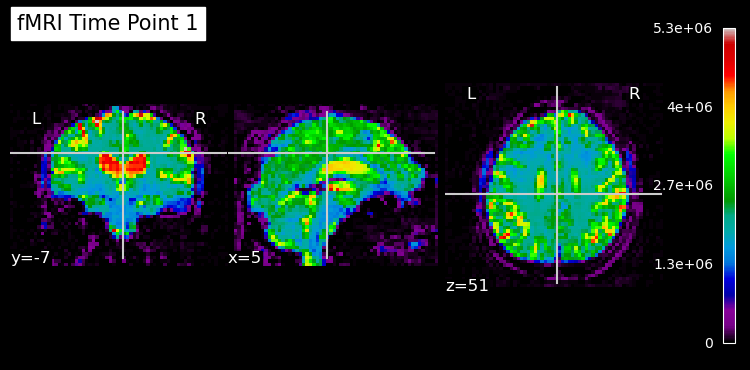

In [23]:

example_nii_path = get_example_scan_file("./DATA/pipelines/base/nii/", "I305240", ".nii")
display_scans_ortho_mode(example_nii_path)


In the image above, we can see three slices of the brain from three different positions: the sagittal, coronal, and axial planes. These correspond to views from above, from the side, and from the front.

We can clearly observe a more intense signal coming from the brain. However, we can also see a lot of very low signals coming from outside the brain, where the skull would be. Since we are primarily interested in measuring brain activity, the information coming from the skull is considered noise, and we would like to remove it. This process is called **brain extraction**.

This will hopefully leave us with only the data captured from the brain.

As luck would have it, there is already an existing functionality in **FSL** for brain extraction called **BET** (Brain Extraction Tool). We will use it, but first, we are going to define some helpful functions that will assist us both here and later in the preprocessing parts of this notebook.


In [24]:

def get_files_list(base_dir, filter_string="", *suffixes):
    """
    Retrieves a list of files from a directory and its subdirectories 
    that match specific suffixes and optionally contain a specified string.

    Returns:
        A sorted list of absolute file paths that match the given criteria.

    """
    files_list = []
    abs_base_path = abspath(base_dir)
    for curr_path, dirs, files in os.walk(abs_base_path):
        for file in files:
            
            if filter_string in file and any(file.lower().endswith(suffix) for suffix in suffixes):
                files_list.append(join(curr_path, file))
    files_list.sort()
    return files_list


def extract_base_name(file_path):
    """
    Extracts the base name of a file without its suffix, handling multi-suffix files 
    like '.nii.gz'.

    """
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    while "." in file_name:  # Handle multi-suffix files like `.nii.gz`
        file_name = os.path.splitext(file_name)[0]
    return file_name


def create_output_paths(input_files, base_dir, suffix):
    """
    Creates a list of output file paths based on input files, a base directory, 
    and a specified suffix.

    Returns:
        list: A sorted list of output file paths.

    """
    output_paths = []
    for i, input_file in enumerate(input_files):
        subject_dir = join(base_dir, str(i + 1))
        os.makedirs(subject_dir, exist_ok=True)

        in_file_name = extract_base_name(input_file)
        out_file_path = join(subject_dir, in_file_name) + suffix
        out_file_path = abspath(out_file_path)
        output_paths.append(out_file_path)

    output_paths.sort()
    return output_paths



<br>

In the following sections, we will use **Nipype**, a Python library that allows us to create pipelines and interface with neuroimaging software like FSL. One of the key features of Nipype is its support for **multiprocessing**, which significantly speeds up data preprocessing. However, we will need to configure this feature, which we'll address in the next cell.

It's important to note that while we won't be fully leveraging Nipype’s capabilities in the interest of keeping this notebook clear and focused on introducing the reader to fMRI data analysis, the potential for increased speed and efficiency is certainly there.

Additionally, neuroimaging libraries in Python tend to be poorly maintained and documented. As a result, fully utilizing any neuroimaging software often involves considerable time and frustration. While we won’t attempt to exploit Nipype to its fullest extent here, it’s worth mentioning that, in theory (and according to some legends), it could offer faster processing speeds.


In [25]:
# Continue even if one task fails
config.set("execution", "stop_on_first_crash", "false")  
# Keep all outputs
config.set("execution", "remove_unnecessary_outputs", "false")  

#CONSTANTS
# Make nipype use multiprocessing 
PLUGIN = "MultiProc"
# Set the number of processes to the nubmer of cpus on this machine 
PLUGIN_ARGS = {"n_procs": os.cpu_count()}

<br>

Now that we have defined some helper methods, let us extract the brain from its skull.

FSL's **BET** method takes in only a 3D brain volume, meaning it processes only one time point at a time and extracts the skull from there. However, we would like to extract the skull from all time points in an fMRI scan. This requires us to perform a few additional steps.

### Step 1: Extract the Mean Brain Volume Image
First, we are going to extract a **mean brain volume** image from the entire fMRI scan. This step is important because patients do not lie completely still while undergoing the fMRI scan, and the brain appears in different positions across time. These movements are small but noticeable, and we will need to account for their consequences later.

But for now, to create a mask that will work for most, if not all, of the volumes in the scan, we would like to calculate the **mean image**. The reason being that the mean image would place the brain in the position where it appears most of the time in the scan. This allows the brain mask we create in the next step to fit most, if not all, of the volumes in the scan.

### Step 2: Apply BET to the Mean Image
Secondly, we will take this mean image and input it into **FSL's BET** method. This will create a mask of the brain without the skull. It will also give us the mean image with the mask already applied so we can compare the volume before and after brain extraction. We will then apply this mask to every volume in the scan, thereby extracting the brain volume from all the time points in the scan.

Of course, we will perform all of these steps for each scan in the database. In the next cell, we are going to create the brain masks for all the scans in our dataset.



In [26]:

def create_barin_mask_for_all_scans(in_base_folder, out_base_folder, mean_out_folder):
    in_paths = get_files_list(in_base_folder, "", ".nii")
    out_paths = create_output_paths(in_paths , out_base_folder, ".nii.gz")
    mean_out_paths = create_output_paths(in_paths , mean_out_folder, ".nii.gz")

    for i in range(len(in_paths)):
        in_path = in_paths[i]
        out_path = out_paths[i]
        mean_out_path = mean_out_paths[i]
        create_barin_mask_single_scan(in_path, out_path, mean_out_path)

def create_barin_mask_single_scan(in_path, out_path, mean_out_path):
    # Compute the mean image
    mean_command = MathsCommand(in_file=in_path, args="-Tmean", out_file=mean_out_path)
    mean_command.run()
    print(f"Mean image created: {mean_out_path}")

    # Run BET on the mean image
    bet = BET()
    bet.inputs.in_file = mean_out_path
    bet.inputs.out_file = out_path
    bet.inputs.mask = True  # Output brain mask
    bet.run()
    print(f"Skull-stripped image saved at: {out_path}")


In [27]:

create_barin_mask_for_all_scans(NII_BASE_DIR, BET_MASKS_DIR, BET_MEAN_DIR)


Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/mean/1/I305240.nii.gz
Skull-stripped image saved at: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/masks/1/I305240.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/mean/10/I267490.nii.gz
Skull-stripped image saved at: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/masks/10/I267490.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/mean/100/I228872_real.nii.gz
Skull-stripped image saved at: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/masks/100/I228872_real.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/mean/101/I382187.nii.gz
Skull-stripped image saved at: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/masks/101/I382187.nii.gz
Mean image c

<br>  

Before we apply these masks, let's take a look at the resulting brain-extracted mean volume image and examine the differences.


In [28]:

def display_2_scans_side_by_side(scan_1_path, scan_1_title, scan_2_path, scan_2_title):

    # Load the fMRI data
    fmri_img = nib.load(scan_1_path)
    mean_img = nib.load(scan_2_path)
    # Create subplots for side-by-side comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Display fMRI images
    plotting.plot_epi(fmri_img, title=scan_1_title, display_mode='ortho', colorbar=True, draw_cross=True,
                      axes=axes[0])
    plotting.plot_epi(mean_img, title=scan_2_title, display_mode='ortho', colorbar=True, draw_cross=True, axes=axes[1])

    plt.tight_layout()
    plt.show()



/tmp/ipykernel_22785/1522483509.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


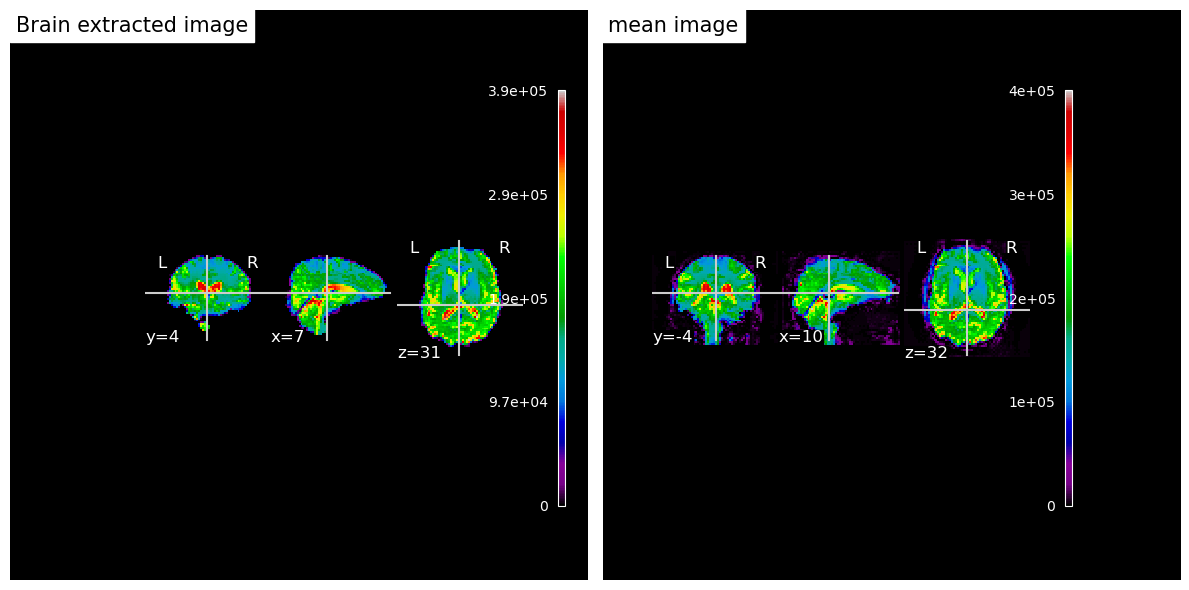

In [29]:

example_nii_bet_path = get_example_scan_file("./DATA/pipelines/base/bet/masks/", "I248516", ".nii.gz")
example_nii_mean_path = get_example_scan_file("./DATA/pipelines/base/bet/mean/", "I248516", ".nii.gz")

display_2_scans_side_by_side(example_nii_bet_path,"Brain extracted image", example_nii_mean_path, "mean image")


### Apply Brain Masks to the Entire Time Series

As we can clearly see from the image above, the brain-extracted image successfully identified the brain and removed all other noise from the data.

That is great news!

Now, let's apply these masks to the entire time series.


In [30]:


def apply_bet_mask_all_scans(in_base_dir, brain_mask_dir, output_dir):
    in_paths = get_files_list(in_base_dir, "", ".nii")
    brain_mask_paths = get_files_list(brain_mask_dir, "mask", ".nii.gz")
    out_paths = create_output_paths(in_paths, output_dir, ".nii.gz")

    for i in range(len(in_paths)):
        in_path = in_paths[i]
        barin_mask_path = brain_mask_paths[i]
        out_path = out_paths[i]
        apply_bet_mask_single_scan(in_path, barin_mask_path, out_path)


def apply_bet_mask_single_scan(fmri_path, bet_mask_path, output_path):
    """
    Applies a BET mask to a 4D fMRI dataset (nii.gz) and saves the masked data.

    """
    # Load the 4D fMRI data
    fmri_img = nib.load(fmri_path)
    fmri_data = fmri_img.get_fdata()

    # Load the BET mask
    bet_mask_img = nib.load(bet_mask_path)
    bet_mask = bet_mask_img.get_fdata()

    # Ensure the mask is binary (0s and 1s)
    bet_mask = bet_mask > 0

    # Apply the mask to each volume in the 4D fMRI data
    masked_fmri_data = fmri_data * bet_mask[..., np.newaxis]
    # Save the masked image
    masked_fmri_img = nib.Nifti1Image(masked_fmri_data, fmri_img.affine)
    nib.save(masked_fmri_img, output_path)

    print(f"Masked fMRI data saved as {output_path}")




In [31]:


apply_bet_mask_all_scans(NII_BASE_DIR, BET_MASKS_DIR, BET_4D_OUT_DIR ) 



Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/1/I305240.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/10/I267490.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/100/I228872_real.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/101/I382187.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/11/I283879.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/12/I264986.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/13/I258605.nii.gz
Masked fMRI data saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/bet/4D/14/I323338.nii.gz
Masked fMRI data saved as /home/ad

<br>

Before we continue, it's important to ensure everything worked correctly. Let's verify that the data in **BET_4D_OUT_DIR** is 4D, meaning we haven't lost the temporal dimension.


In [32]:

example_bet_nii_file = get_example_scan_file("./DATA/pipelines/base/bet/4D/", "I248516", ".nii.gz")
nii_file = nib.load(example_bet_nii_file)

# Get the image data as a NumPy array
img_data = nii_file.get_fdata()

print("Shape of the NIfTI file:", img_data.shape)

Shape of the NIfTI file: (64, 64, 48, 140)


<br>

**Bully for us!** After all that, our data is still 4D, meaning everything went smoothly.

Now that we have extracted the brain from its skull, let's take a look at the temporal dimension. As we have discussed, the data consists of the change in brain activity over time. Since we cannot visualize all four dimensions simultaneously, we will take a 2D slice of the spatial data and present its changes over time to better understand the temporal dynamics.


In [33]:

def visualize_fmri_sagittal_slice(fmri_file, slice_index, interval=100):
    """
    Visualize a sagittal slice of fMRI data over time as a GIF in a Jupyter Notebook.
    Returns:
        HTML: Animation embedded in Jupyter Notebook.
    """
    # Load the fMRI data
    img = nib.load(fmri_file)
    data = img.get_fdata()
    
    # Extract the sagittal slice across time
    slice_data = data[slice_index, :, :, :] 

    # Set up the animation
    fig, ax = plt.subplots()
    cax = ax.imshow(slice_data[:, :, 0], cmap="gray", vmin=np.min(slice_data), vmax=np.max(slice_data))
    ax.set_title(f"Timepoint: 0")
    fig.colorbar(cax)
    
    def update_frame(t):
        cax.set_data(slice_data[:, :, t])
        ax.set_title(f"Timepoint: {t}")
        return cax,

    n_timepoints = slice_data.shape[-1]
    ani = FuncAnimation(fig, update_frame, frames=n_timepoints, interval=interval, blit=True)

    return HTML(ani.to_jshtml())



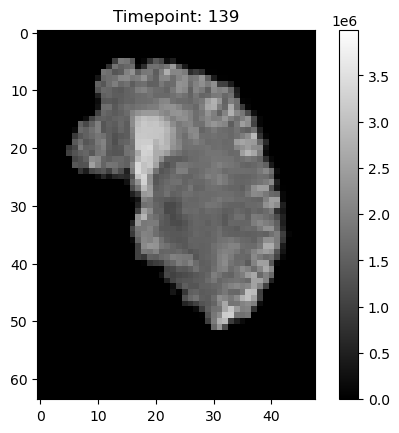

In [34]:

fmri_file =  get_example_scan_file("./DATA/pipelines/base/bet/4D/", "I323338", ".nii.gz")
slice_index = 40  
interval = 10  

visualize_fmri_sagittal_slice(fmri_file, slice_index, interval)


## Realignment

As we can see, the changes in gray value of the image indicate the fluctuations in the BOLD signal. However, if we look closely, around frame 40, we notice a slight movement of the entire slice, indicating patient motion. This is not ideal, as the assumption is that each voxel represents the activity of the same brain region over time. If the person moves, that same voxel might represent a different part of the brain at different points in time, leading to inaccurate data.

Fortunately, this is a known issue in fMRI scans, and the way to deal with such movements is to **realign the data**. Essentially, there are algorithms that use rigid body transformation (translation in 3 axes and rotation in 3 axes) to align the brain volume throughout the scan to an anchor volume, usually the first volume in the series. 

Great! Now that we understand the problem and the solution, let's implement it.


In [35]:


def create_workflow(name, nodes):
    work_flow = Workflow(name=name)
    work_flows_dir = os.path.abspath("./workflows/")
    os.makedirs(work_flows_dir, exist_ok=True)
    work_flow.base_dir = work_flows_dir
    work_flow.add_nodes(nodes)
    return work_flow


def realign(in_base_dir, realigned_base_dir):

    in_files = get_files_list(in_base_dir, "", ".nii.gz")
    realigned_paths = create_output_paths(in_files, realigned_base_dir, ".nii.gz")

    # Use MapNode to process multiple files
    realign_mapnode = MapNode(
        MCFLIRT(cost="normcorr", save_mats=True, save_plots=True),
        iterfield=["in_file", "out_file"],
        name="realign_mapnode"
    )

    realign_mapnode.inputs.in_file = in_files
    realign_mapnode.inputs.out_file = realigned_paths

    wf_realign = create_workflow("realignment_workflow", [realign_mapnode])
    wf_realign.run(plugin=PLUGIN, plugin_args=PLUGIN_ARGS)
    print("\n\nrealign completed!\n\n")


In [36]:

realign(BET_4D_OUT_DIR, REALIGN_BASE_DIR)


250124-18:40:22,199 nipype.workflow INFO:
	 Workflow realignment_workflow settings: ['check', 'execution', 'logging', 'monitoring']
250124-18:40:22,204 nipype.workflow INFO:
	 Running in parallel.
250124-18:40:22,213 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 13.67/13.67, Free processors: 8/8.
250124-18:40:24,216 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 101 jobs ready. Free memory (GB): 13.67/13.67, Free processors: 8/8.
250124-18:40:24,474 nipype.workflow INFO:
	 [Node] Setting-up "_realign_mapnode0" in "/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/workflows/realignment_workflow/realign_mapnode/mapflow/_realign_mapnode0".
250124-18:40:24,478 nipype.workflow INFO:
	 [Node] Setting-up "_realign_mapnode2" in "/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/workflows/realignment_workflow/realign_mapnode/mapflow/_realign_mapnode2".
250124-18:40:24,476 nipype.workflow INFO:
	 [Node] Setting-up "_realign_mapnode1" in "/home/a

### Visualizing the Effects of Realignment  
<br>  

Now that realignment is complete, let’s revisit the same slice we examined earlier and visualize it across time, this time after realignment.  

<br>


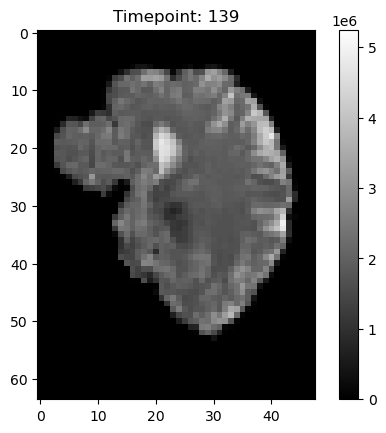

In [37]:

realigned_fmri_file =  get_example_scan_file("./DATA/pipelines/base/realign/", "I323338", ".nii.gz")
visualize_fmri_sagittal_slice(realigned_fmri_file, slice_index, interval)


##  Normalization  
<br>  

Looks to me like the movement around frame 40 is now gone. Admittedly, it’s hard to tell because fMRI data doesn’t have great spatial resolution, but nevertheless, it appears to be an improvement.  

Now that we have the brain extracted and the data realigned, we can move to the next stage. As is probably obvious to you, esteemed readers of this here notebook, different people have different head and brain sizes. Also, their position in the scanner might not be exactly the same.  

We would like to **normalize** this, making sure that each brain is the same size and in the same spot as all others. After all, we’d like our ML algorithms to learn to distinguish between **AD**, **MCI**, and **CN** based on changes in brain activity over time, and not from the patient’s head size or position in the scanner. Neither of these are biomarkers for AD or MCI.  

This step is unsurprisingly called **Normalization** and is a well-known part of fMRI preprocessing.  

In this step, we take the data of each patient and align it through **non-rigid body transformation** into a *normalized brain*. This normalized brain, in our case, is the **MNI normalized template**, which is a combined scan of 125 people. We are going to align each patient’s entire 4D scan into this **MNI space**.  

The normalization process involves:  
1. **Mean Image Calculation:** Extracting a mean 3D brain volume from the realigned data.  
2. **Transformation Mapping:** Creating a transformation matrix to align the mean image with the MNI template.  
3. **Applying the Transformation:** Mapping each 3D brain volume in the time series to the MNI space.  

With this, our data will be normalized, and we can rest assured that any patterns our ML models learn will be based on **brain activation patterns** and not on arbitrary biases like head size or scanner position.  

---

Since this process takes a long time to compute, we will use multiprocessing to speed it up. First, we will define the method that performs the normalization for a single scan.



In [38]:


def normalize_with_fsl(realigned_path, mean_image_path, affine_matrix_path, registered_mean_path, normalized_path):
    """Perform normalization for a single file using FSL."""
    # fetch the MNI152 2milimiter normalized brain volume from fsls defualts
    mni_template_path = Info.standard_image("MNI152_T1_2mm_brain.nii.gz")

    # Ensure output directories exist
    os.makedirs(os.path.dirname(mean_image_path), exist_ok=True)
    os.makedirs(os.path.dirname(affine_matrix_path), exist_ok=True)
    os.makedirs(os.path.dirname(registered_mean_path), exist_ok=True)
    os.makedirs(os.path.dirname(normalized_path), exist_ok=True)

    # Compute the mean image
    mean_command = MathsCommand(in_file=realigned_path, args="-Tmean", out_file=mean_image_path)
    mean_result = mean_command.run()
    print(f"Mean image created: {mean_result.outputs.out_file}")

    # Compute the transformation matrix
    flirt_mean = FLIRT(
        in_file=mean_image_path,
        reference=mni_template_path,
        out_matrix_file=affine_matrix_path,
        out_file=registered_mean_path,
    )
    flirt_mean_result = flirt_mean.run()
    print(f"Transformation matrix created: {flirt_mean_result.outputs.out_matrix_file}")
    print(f"Registered mean image created: {flirt_mean_result.outputs.out_file}")

    # Apply transformation to the 4D dataset
    flirt_apply = FLIRT(
        in_file=realigned_path,
        reference=mni_template_path,
        apply_xfm=True,
        in_matrix_file=affine_matrix_path,
        out_file=normalized_path,
    )
    flirt_apply_result = flirt_apply.run()
    print(f"Normalized 4D dataset created: {flirt_apply_result.outputs.out_file}")

    # Verify output using fslinfo
    normalized_info = Info.output_type_to_ext("NIFTI")
    print(f"fslinfo for {normalized_path}:")
    os.system(f"fslinfo {normalized_path}")



<br>

Next, we will create the code for a worker that retrieves all the necessary data to normalize an fMRI scan from a queue and executes the normalization.


In [39]:


def worker(queue):
    """Worker function to process normalization tasks from the queue."""
    while not queue.empty():
        try:
            
            task = queue.get_nowait()
            (
                realigned_path,
                mean_image_path,
                affine_matrix_path,
                registered_mean_path,
                normalized_path,
            ) = task

            normalize_with_fsl(
                realigned_path,
                mean_image_path,
                affine_matrix_path,
                registered_mean_path,
                normalized_path,
            )
        except Exception as e:
            print(f"Error processing task: {e}")
            continue



<br>

Great! Now that we have the worker and the function to execute, the only thing missing is the function that creates and manages the queue, which we will write next.


In [40]:


def normalize(realigned_dir, mean_dir, affine_mat_dir, registered_mean_dir, normalized_out_dir, num_processes):
    """Main function to initialize the queue and spawn processes for normalization."""
    realigned_files_list = get_files_list(realigned_dir, "", ".nii.gz")

    mean_files_list = create_output_paths(realigned_files_list, mean_dir, ".nii.gz")
    affine_mat_list = create_output_paths(realigned_files_list, affine_mat_dir, ".nii.gz")
    registered_mean_files_list = create_output_paths(realigned_files_list, registered_mean_dir, ".nii.gz")
    normalized_files_list = create_output_paths(realigned_files_list, normalized_out_dir, ".nii.gz")

    queue = Queue()
    for i in range(len(realigned_files_list)):
        queue.put(
            (
                realigned_files_list[i],
                mean_files_list[i],
                affine_mat_list[i],
                registered_mean_files_list[i],
                normalized_files_list[i],
            )
        )

    processes = []
    for _ in range(num_processes):
        process = Process(target=worker, args=(queue,))
        process.start()
        processes.append(process)

    # Wait for all processes to finish
    for process in processes:
        process.join()



<br>

And now, all that remains is to run the normalization function.


In [41]:

# Run normalization routine with multiprocessing
num_processes = os.cpu_count() - 2 
normalize(
    REALIGN_BASE_DIR,
    BASE_PIPELINE_NORMALIZED_MEAN_IMAGES_DIR,
    BASE_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR,
    BASE_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR,
    BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR,
    num_processes= num_processes
)



Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mean_images/10/I335306.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mean_images/1/I305240.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mean_images/11/I398684.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mean_images/101/I341972.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mean_images/100/I280778.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mean_images/12/I346237.nii.gz
Transformation matrix created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/affine_matrices/10/I335306.nii.gz
Registered mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/

<br>

As it is good practice, we should check that the normalization went well by first checking the shape of all our data to see if it is all in MNI space. We will compare it to the shape of the data before normalization and the shape of the template we normalized to.


In [42]:


def check_shapes(file_list):
    """
    Check if all files in the list have the same shape.
    """

    reference_shape = nib.load(file_list[0]).shape
    all_match = True

    for file_path in file_list[1:]:
        current_shape = nib.load(file_path).shape
        if current_shape != reference_shape:
            all_match = False
            break

    if all_match:
        print("All files have the same shape:", reference_shape)
    else:
        print("Mismatch in file shapes detected. Not all files have the same shape.")



In [43]:

noralized_files_list = get_files_list(BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR,"",".nii.gz" )
check_shapes(noralized_files_list)

normalized_file_to_check_path =  get_example_scan_file("./DATA/pipelines/base/realign/", "I323338", ".nii.gz")
normalized_file_to_check_shape = nib.load(normalized_file_to_check_path).shape
print( f"shape of scans before normalization {normalized_file_to_check_shape} ")



All files have the same shape: (91, 109, 91, 140)
shape of scans before normalization (64, 64, 48, 140) 


## Feature Extraction  
<br>  

Now that we have normalized the data and looked at its shape, we’ll notice that it’s still extremely large.  

One patient’s scan contains a brain volume with **91×109×91** pixels over **140 time points**. That’s a staggering **126,368,060 data points per patient**!
  
This is an **enormous dimensionality** for a single example. To avoid the **curse of dimensionality**, where high-dimensional data requires a vast number of examples to train properly, we need to **extract meaningful features** from these normalized brain volumes.  

We’ll begin by mapping the normalized brain volume to an **atlas**.  

*What’s an atlas?* I hear you ask.  

An **atlas** is a **3D brain volume mask** that contains multiple labeled regions. Each label represents an **area of the brain**, such that all voxels with the same label belong to the same brain structure. These regions have been meticulously defined by experts, ensuring they represent **meaningful brain structures**.  

To make this clearer, let’s **visualize an atlas** with several **regions of interest (ROIs)** highlighted in **distinct colors**.  


In [44]:


def visualize_atlas_rois(atlas_path, highlighted_regions):
    """
    Visualize selected ROIs from an atlas with different colors.

    """

    atlas_img = image.load_img(atlas_path)
    atlas_data = atlas_img.get_fdata()
    
    colored_atlas = np.zeros_like(atlas_data)
    
    for i, region in enumerate(highlighted_regions):
        colored_atlas[atlas_data == region] = i + 1  

    # Plot the regions with different colors
    plotting.plot_roi(image.new_img_like(atlas_img, colored_atlas),
                      title='Highlighted Brain Regions',
                      display_mode='ortho',
                      cut_coords=(0, 0, 0),
                      cmap="tab10")
    
    plt.show()



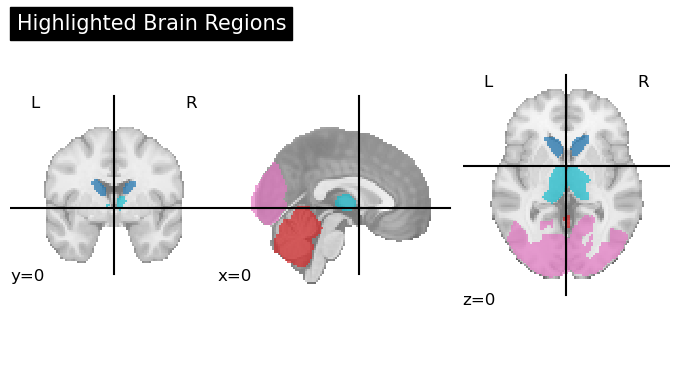

In [45]:


visualize_atlas_rois(MNI_ATLAS_IMG_PATH, [1,2,5,9 ])



## **Using an Atlas**  
<br>  

Now that we have a clearer understanding of what an atlas represents, we can proceed to **feature extraction**.  

We’ll use an atlas to **extract the mean value** from specific **Regions of Interest (ROIs)** and create a **mean time series** for each region.  

Atlases typically contain a **small number of ROIs** compared to the **126,368,060 unique voxels** in our normalized data. This step will result in a **massive dimensionality reduction**, while preserving a **meaningful representation of brain activity** across different regions.  

In essence, we’re performing **feature extraction** on our data, transforming it into a **more manageable** and **insightful format** for downstream analysis.  


In [46]:


def extract_all_mean_time_series_with_atlas_mapping(normalized_dir, atlas_file, base_out_dir):
    normalized_files = get_files_list(normalized_dir, "", ".nii.gz")
    mean_time_series_out_files = create_output_paths(normalized_files, base_out_dir, ".csv")
    
    un_sucsseful_files = [] 
    
    for i in range(len(normalized_files)):
        try:
            normalized_file = normalized_files[i]
            mean_time_series_out_file = mean_time_series_out_files[i]
            extract_mean_time_series_with_atlas_mapping(normalized_file, atlas_file, mean_time_series_out_file)
        except Exception as e:
            # Somethimes files get currpted in the preprocessing process no clue why 
            print(f"Error processing file {normalized_files[i]}")
            un_sucsseful_files.append(normalized_files[i])
    
    return un_sucsseful_files


def extract_mean_time_series_with_atlas_mapping(normalized_file, atlas_file, output_file):

    atlas_img = nib.load(atlas_file)
    atlas_data = atlas_img.get_fdata()
    normalized_img = nib.load(normalized_file)
    normalized_data = normalized_img.get_fdata()

    roi_labels = np.unique(atlas_data)
    # Exclude background (0)
    roi_labels = roi_labels[roi_labels > 0]

    time_series_dict = {}

    for roi in roi_labels:
        # Create a mask for the ROI
        roi_mask = atlas_data == roi
        # Extract the mean time series for the ROI
        roi_time_series = normalized_data[roi_mask, :].mean(axis=0)
        # Replace NaNs with the mean if there are any
        roi_time_series = np.nan_to_num(roi_time_series, nan=np.nanmean(roi_time_series))
        time_series_dict[int(roi)] = roi_time_series

    # Save time series to a csv
    time_series_df = pd.DataFrame(time_series_dict)
    time_series_df.to_csv(output_file, index=False)
    print(f"Time series for all ROIs saved to {output_file}")



In [47]:

extract_all_mean_time_series_with_atlas_mapping(BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR, MNI_ATLAS_IMG_PATH,
                                                BASE_MNI_ROI_EXTRACTION_DIR)

print("finsihed ")

Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/roi_extraction/1/I305240.csv
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/10/I335306.nii.gz
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/roi_extraction/100/I272535.csv
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/101/I341972.nii.gz
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/11/I398684.nii.gz
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/12/I346237.nii.gz
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/13/I248516.nii.gz
Time series for all ROIs saved to /home/adi/Desktop/keep/code/g



## **Introduction to Dynamic Connectivity Networks (DCNs)**  
<br>  

At this point, we have extracted **mean time series data** from each **Region of Interest (ROI)** defined by our atlas. This dataset represents the average brain activity over time for each brain region.  

To uncover **meaningful relationships** between these regions, we can represent their interactions using **Dynamic Connectivity Networks (DCNs)**.  

A **DCN** is a **matrix** that captures the **correlation between different brain regions over time**. It allows us to observe how the connections between brain regions **fluctuate dynamically** throughout the scan. This approach was employed by **Jie et al.**, as referenced in our introduction.  

In neuroscience, the brain is often conceptualized as a **dynamic network of nodes** (brain regions) that **communicate with each other**. By analyzing a DCN, we can:  

- Identify **which brain regions are active simultaneously**, suggesting communication between them.  
- Understand **how these relationships evolve over time**, revealing patterns of brain connectivity.  

### **The Role of Time Windows in DCNs**  
To construct a **DCN**, we’ll divide the mean time series data into **non-overlapping time windows**.  

A **window** refers to a segment of consecutive time points from the time series. Within each window, we calculate the **correlation matrix** to capture the relationships between brain regions during that specific time period.  

Using **non-overlapping windows** ensures that each segment represents an **independent snapshot of brain activity**, allowing us to observe how brain connectivity changes over distinct time intervals.  

In the next step, we’ll construct a **DCN** from our mean time series data using these **non-overlapping time windows**. This transformation will enable us to apply **spatial and temporal feature extraction**, generating meaningful **feature vectors** for further analysis.  


In [48]:


def create_all_DCNs(time_series_base_dir, base_out_dir):
    
    time_series_files = get_files_list(time_series_base_dir, "",".csv")
    dcn_out_files = create_output_paths(time_series_files, base_out_dir,  ".npy")
    
    for i in range(len(time_series_files)):
        time_series_file = time_series_files[i]
        dcn_out_file = dcn_out_files[i]
        create_DCN(time_series_file, dcn_out_file)


def create_DCN(time_series_path, out_path):
    roi_time_series_df = pd.read_csv(time_series_path)
    windows = split_into_non_overlapping_windows(roi_time_series_df, 20)
    dcn = compute_connectivity_for_all_windows(windows)
    save_DCN(dcn, out_path)


def compute_connectivity_for_all_windows(windows):
    # Create the DCN
    dcn = [window.corr().to_numpy() for window in windows]
    print(f"Created DCN with {len(dcn)} windows.")
    return dcn


def split_into_non_overlapping_windows(df, window_size):
    num_rows = len(df)
    num_windows = num_rows // window_size
    windows = [df.iloc[i * window_size: (i + 1) * window_size] for i in range(num_windows)]

    print(f"Divided time series into {len(windows)} windows of size {window_size}")
    return windows


def save_DCN(dcn, output_path):
    # Save the DCN as numpy array
    np.save(output_path, dcn)  
    print(f"DCN saved as {output_path}.")



In [49]:


create_all_DCNs(BASE_MNI_ROI_EXTRACTION_DIR, BASE_MNI_DCN_DIR )
print("finished")



Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/DCN/1/I305240.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/DCN/10/I321520.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/DCN/11/I273181.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/DCN/12/I297106.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/mni/DCN/13/I256148.npy.
Divided time series into 7 windows of size 20


<br>

And now, once again, as has become a tradition in this notebook, we have a new type of data. To understand it better, we are going to visualize it.


In [50]:


def visualize_dcn(dcn_path, roi_labels=None):
    
    dcn = np.load(dcn_path, allow_pickle=True)
    print(dcn.shape)
    
    num_matrices = len(dcn)
    cols = min(4, num_matrices)  
    rows = (num_matrices + cols - 1) // cols  
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten() if num_matrices > 1 else [axes]
    
    for i, matrix in enumerate(dcn):
        sns.heatmap(matrix, cmap="coolwarm", cbar=True, 
                    xticklabels=roi_labels, yticklabels=roi_labels, ax=axes[i])
        axes[i].set_title(f"Window {i+1}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()



(7, 9, 9)


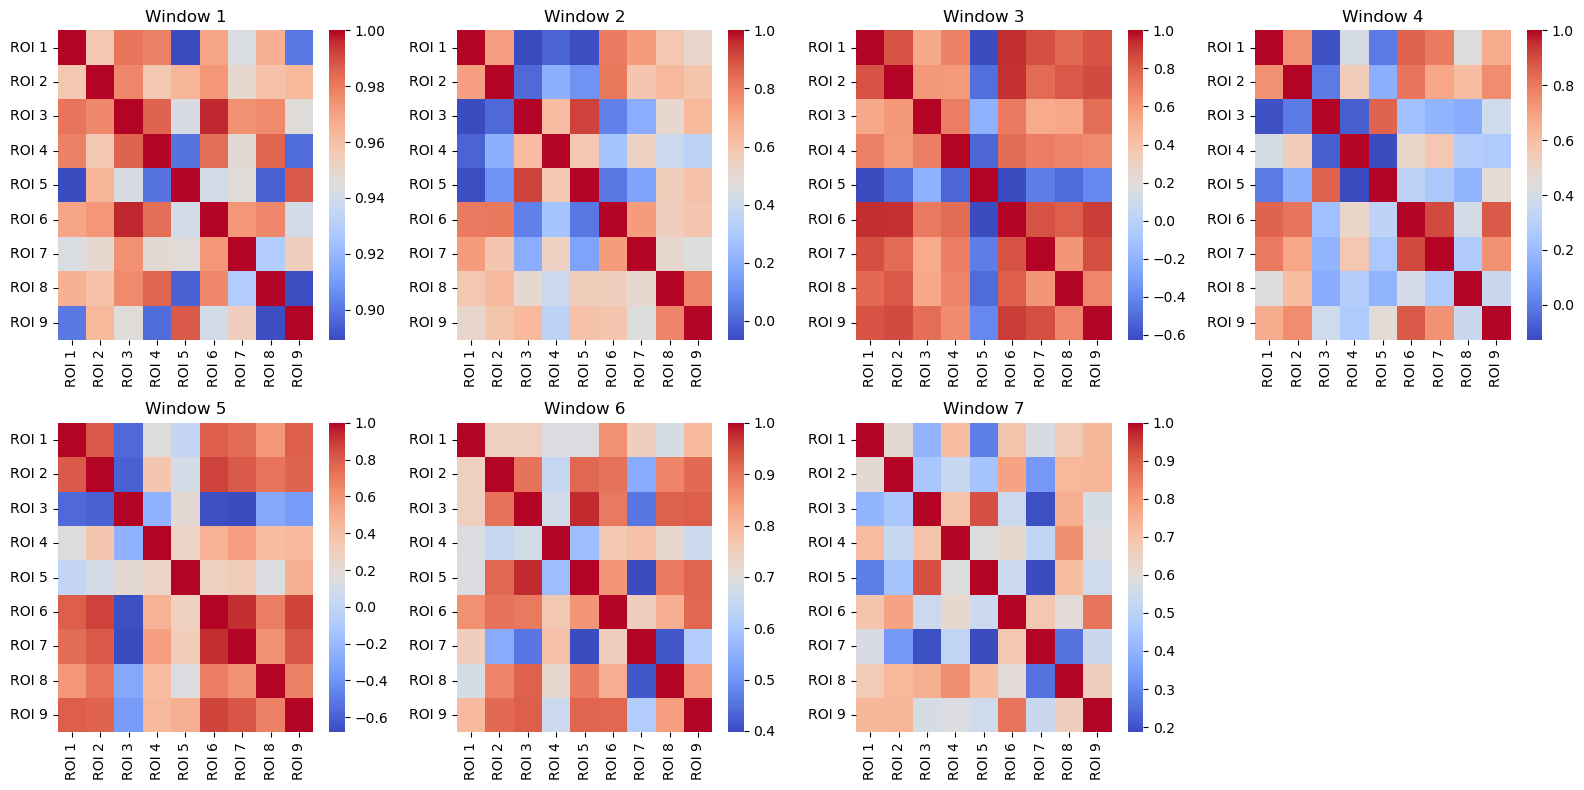

In [51]:

roi_labels = [f"ROI {i}" for i in range(1, 10)]  
example_dcn_file_path = get_example_scan_file("./DATA/pipelines/base/normalized/mni/DCN/", "I354814", ".npy")
 
visualize_dcn(example_dcn_file_path, roi_labels)


We can see that the Dynamic Connectivity Network (DCN) consists of 7 matrices, which results from calculating the DCN using non-overlapping windows of size 20, covering a total of 140 time points. Each matrix represents the changes in connectivity between different Regions of Interest (ROIs) across one of the 7 windows.

For example, in the top-left corner of the matrices, ROIs 1 and 2 show a strong correlation throughout the scan. Conversely, ROIs 1 and 5 exhibit weak correlation in all time windows.

Along the diagonal of each matrix, we observe strong correlations, as expected. This is because each ROI is strongly correlated with itself since it is active whenever it is active, so its correlation with itself should be 1, which is what we see. It's important to remember that the DCN comprises the entire set of 7 matrices. These matrices illustrate the changes in connectivity between different ROIs over time.

Additionally, the DCN matrix is symmetric along its main diagonal. Since the upper triangle contains the same information as the lower triangle, we do not need to store the lower triangle data. For the sake of convenience, we save the entirety of the matrix. In the next few cells, we will proceed with feature extraction, focusing on both temporal and spatial features from the DCN, using the methods employed by Biao Jie, Mingxia Liu, and Dinggang Shen, as referenced in the introduction.

In this analysis, we will use only the upper triangular part of the matrix to avoid calculating duplicate features.


## Spatial Feature Extraction 

### Spatial Variability

Spatial variability measures how much the connectivity patterns of a specific Region of Interest (ROI) fluctuate with other ROIs over time. It quantifies whether a specific area of the brain is consistently active with the same regions or not. 

In simple terms, if an area of the brain is consistently active with the same other areas, we say it has **low spatial variability** (close to 0). Conversely, if the area interacts with different regions over time, we say it has **high spatial variability**. 

To summarize: spatial variability reflects the consistency of activation between an ROI and other areas of the brain. Low variability indicates consistent activation with the same group of ROIs, while high variability suggests dynamic and changing activation patterns.

---

## The Math Behind Spatial Variability

### Functional Sequence

To calculate spatial variability, we start by defining the **functional sequence** for a pair of ROIs $r$ and $q$, which represents how their connectivity changes over time:

$$
F_{(:)}(r, q) = 
\begin{bmatrix} 
F_1(r, q), F_2(r, q), \ldots, F_v(r, q) 
\end{bmatrix}^T
$$

Here:
- $F_i(r, q)$: Functional connectivity between $r$ and $q$ in time window $i$.
- $v$: Total number of time windows.

This sequence captures the temporal evolution of connectivity between two ROIs.

---

### Calculating Spatial Variability

The spatial variability of an ROI $r$ is calculated as:

$$
s_r = 1 - \frac{1}{(n - 1)(n - 2)} \sum_{\substack{p,q=1 \\ p \neq q \neq r}} 
\text{similarity}\big(F_{(:)}(r, p), F_{(:)}(r, q)\big)
$$

Where:
- $n$: Total number of ROIs.
- $p, q$: Indices of ROIs excluding $r$.
- $\text{similarity}(F_{(:)}(r, p), F_{(:)}(r, q))$: A measure of how similar the functional sequences of ROI $r$ with $p$ and $q$ are.

---

### What Does It All Mean?

- **Low Variability** ($s_r$ close to 0): ROI $r$ has stable and consistent connectivity patterns with other ROIs over time. In other words, it is usually active when the same group of ROIs is active.
- **High Variability** ($s_r$ close to 1): ROI $r$ shows fluctuating connectivity with other ROIs. This means it is often active with different groups of ROIs rather than consistently with the same ones.

For example:
If ROI 4 interacts consistently with ROIs 5 and 6 across all time windows, its spatial variability will be **low**. If its interaction with ROI 5 changes dramatically over time while remaining stable with ROI 6, its spatial variability will be **higher**.

---

In the next cell, we will write the functions to calculate spatial variability, but we will not execute them yet.


In [52]:


def spatial_variability(dcn):
    """
    Compute spatial variability features for all brain regions in the DCN.

    """
    _, num_regions, _ = dcn.shape
    spatial_variability_features = []

    for target_region_idx in range(num_regions):
        # Extract connectivity sequences for the current region across all other regions
        target_region_connectivity = dcn[:, :, target_region_idx] 
        region_correlations = []

        # Compute correlations between all pairs of regions (excluding the current region)
        for region_a_idx in range(num_regions):
            if region_a_idx == target_region_idx:
                continue
            for region_b_idx in range(region_a_idx + 1, num_regions):
                if region_b_idx == target_region_idx:
                    continue
                correlation = \
                np.corrcoef(target_region_connectivity[:, region_a_idx], target_region_connectivity[:, region_b_idx])[
                    0, 1]
                region_correlations.append(correlation)

        # Compute spatial variability
        spatial_variability_score = 1 - np.mean(region_correlations)
        spatial_variability_features.append(spatial_variability_score)

    return np.array(spatial_variability_features)



## Temporal Feature Extraction

## Temporal Variability

Temporal variability measures how much the connectivity patterns of a specific Region of Interest (ROI) change over time. In other words, it looks at how the ROI’s connections to other regions fluctuate across different time periods.

If an ROI is active with the same set of regions over time, it has **low temporal variability** (close to 0). If the set of ROIs that are active with a specific ROI changes often between time windows, then it has **high temporal variability**.

---

## The Math Behind Temporal Variability

### Functional Architecture

To calculate temporal variability, we first define the **functional architecture** of an ROI $r$ at time window $i$:

$$
F_i(r, :) = 
\begin{bmatrix} 
F_i(r, 1), F_i(r, 2), \ldots, F_i(r, r-1), F_i(r, r+1), \ldots, F_i(r, n)
\end{bmatrix}^T
$$

Here:
- $F_i(r, n)$: Functional connectivity of brain region $r$ with ROI $n$ at the $i$th time window.
- $n$: Total number of ROIs.
- $F_i(r, :)$: The functional architecture of ROI $r$, excluding its self-connectivity $F_i(r, r)$.

This sequence captures the connectivity profile of $r$ with all other ROIs at a specific time window.

---

### Calculating Temporal Variability

The temporal variability of an ROI $r$ is defined as:

$$
t_r = 1 - \frac{1}{v(v - 1)} \sum_{\substack{i, j = 1 \\ i \neq j}}^v 
\text{corr}\big(F_i(r, :), F_j(r, :)\big)
$$

Where:
- $v$: Total number of time windows.
- $\text{corr}(F_i(r, :), F_j(r, :))$: The correlation coefficient between the functional architectures of ROI $r$ at time windows $i$ and $j$.

This formula computes the average correlation among all functional architectures of $r$ across time, which reflects their temporal similarity. The variability is derived by subtracting this value from 1.

---

### What Does It All Mean?

- **Low Variability** ($t_r$ close to 0): ROI $r$ is active with the same set of regions consistently over time, indicating stable temporal behavior.
- **High Variability** ($t_r$ close to 1): ROI $r$ shows different sets of regions it is active with at different times, indicating dynamic and fluctuating temporal behavior.

For example:
If ROI 4 is active with the same regions throughout all time windows, its temporal variability will be **low**. However, if the set of regions ROI 4 is active with changes frequently between time windows, its temporal variability will be **high**.

---

In the next cell, we will write the functions to calculate temporal variability, but we will not execute them yet.


In [53]:


def temporal_variability(dcn):
    """
    Compute temporal variability features for all brain regions in the DCN.

    """
    num_windows, num_regions, _ = dcn.shape
    temporal_variability_features = []

    for region_idx in range(num_regions):
        # Extract region's connectivity across all windows
        region_connectivity = dcn[:, region_idx, :]
        window_correlations = []

        # Compute correlations between all pairs of windows
        for window_i in range(num_windows):
            for window_j in range(window_i + 1, num_windows):
                correlation = np.corrcoef(region_connectivity[window_i], region_connectivity[window_j])[0, 1]
                window_correlations.append(correlation)

        # Compute temporal variability
        temporal_variability_score = 1 - np.mean(window_correlations)
        temporal_variability_features.append(temporal_variability_score)

    return np.array(temporal_variability_features)



<br>

**Great!** Now that we have defined and understood spatial and temporal variability, let's extract these metrics from our entire dataset.


In [54]:


def extract_temporal_and_spatial_features(dcn_path):
    """
    Extract temporal and spatial variability features from a DCN file.

    """
    dcn = np.load(dcn_path, allow_pickle=True)  
    # Compute temporal and spatial variability features
    tvf = temporal_variability(dcn)
    svf = spatial_variability(dcn)
    # Change the names of temporal and spatial features for each ROI for clearity 
    temporal_columns = [f"temporal_roi_{i+1}" for i in range(len(tvf))]
    spatial_columns = [f"spatial_roi_{i+1}" for i in range(len(svf))]
    
    # Convert to DataFrame with appropriate column names
    features = np.concatenate([tvf, svf])
    feature_df = pd.DataFrame([features], columns=temporal_columns + spatial_columns)
   
    return feature_df


def extract_temporal_and_spatial_features_from_all(dcn_base_dir):
    dcn_files = get_files_list(dcn_base_dir,"", ".npy")
    combined_features = pd.DataFrame()

    for dcn_file_path in dcn_files:
        # Extract the Image Data ID (file name without suffix)
        image_data_id = os.path.splitext(os.path.basename(dcn_file_path))[0]
        
        feature_df = extract_temporal_and_spatial_features(dcn_file_path)
        feature_df['Image Data ID'] = image_data_id
        # Reorganize columns so Image Data ID is the first column
        feature_df = feature_df[['Image Data ID'] + [col for col in feature_df.columns if col != 'Image Data ID']]
        combined_features = pd.concat([combined_features, feature_df], ignore_index=True)

    print(f"Aggregated features from {len(dcn_files)} DCNs into a single DataFrame.")
    return combined_features




In [55]:

extracted_features_df = extract_temporal_and_spatial_features_from_all(BASE_MNI_DCN_DIR)

# Now extracted_features_df has the features plus the 'Group' column
extracted_features_df.head()

Aggregated features from 77 DCNs into a single DataFrame.


Image Data ID  temporal_roi_1  temporal_roi_2  temporal_roi_3  \
0       I305240        0.513612        0.289242        0.372340   
1       I321520        0.283091        0.188922        0.207827   
2       I273181        0.394408        0.250841        0.536236   
3       I297106        0.337096        0.195635        0.336366   
4       I256148        0.353925        0.213106        0.242669   

   temporal_roi_4  temporal_roi_5  temporal_roi_6  temporal_roi_7  \
0        0.386984        0.247484        0.421727        0.220108   
1        0.330969        0.226755        0.478773        0.352496   
2        0.382406        0.333481        0.548013        0.571067   
3        0.343456        0.256977        0.446735        0.358104   
4        0.278669        0.282958        0.262862        0.297087   

   temporal_roi_8  temporal_roi_9  spatial_roi_1  spatial_roi_2  \
0        0.229111        0.340014       0.470503       0.352463   
1        0.243922        0.400532       0.187982       0.285546   
2        0.318921        0.454734       0.369165       0.335481   
3        0.235647        0.426625       0.151773       0.423963   
4        0.298048        0.472645       0.231772       0.345377   

   spatial_roi_3  spatial_roi_4  spatial_roi_5  spatial_roi_6  spatial_roi_7  \
0       0.370096       0.359406       0.359794       0.358208       0.491634   
1       0.343524       0.190896       0.348383       0.384502       0.474297   
2       0.412359       0.334707       0.339832       0.468639       0.388467   
3       0.466131       0.271398       0.408624       0.501107       0.289507   
4       0.282700       0.148853       0.362664       0.301325       0.135322   

   spatial_roi_8  spatial_roi_9  
0       0.270819       0.285045  
1       0.274434       0.288316  
2       0.265470       0.344759  
3       0.257376       0.297824  
4       0.317932       0.238902

## Adding Labels to the DataFrame

Now that we have a pandas DataFrame with the extracted temporal and spatial features, along with the Image Data ID as the identifier, let's add the labels to the DataFrame we extracted at the beginning of this notebook.


In [56]:

# Extract only the 'Image Data ID' and 'Group' columns from df
# Make a copy to avoid the warning
labels = df[['Image Data ID', 'Group']].copy()  

# Convert the 'Group' column to numeric labels
label_encoder = LabelEncoder()
labels.loc[:, 'Group'] = label_encoder.fit_transform(labels['Group'])
labels['Group'] = labels['Group'].astype(int) 
class_names = label_encoder.classes_

# Merge the 'Group' column into the extracted_features_df based on 'Image Data ID'
# Set suffixes to empty strings to avoid extra columns
extracted_features_wit_labels_df = pd.merge(extracted_features_df, labels, on='Image Data ID', how='left', suffixes=('', ''))
extracted_features_with_labels_df= extracted_features_wit_labels_df.dropna()
extracted_features_with_labels_df.head()


Image Data ID  temporal_roi_1  temporal_roi_2  temporal_roi_3  \
0       I305240        0.513612        0.289242        0.372340   
1       I321520        0.283091        0.188922        0.207827   
2       I273181        0.394408        0.250841        0.536236   
3       I297106        0.337096        0.195635        0.336366   
4       I256148        0.353925        0.213106        0.242669   

   temporal_roi_4  temporal_roi_5  temporal_roi_6  temporal_roi_7  \
0        0.386984        0.247484        0.421727        0.220108   
1        0.330969        0.226755        0.478773        0.352496   
2        0.382406        0.333481        0.548013        0.571067   
3        0.343456        0.256977        0.446735        0.358104   
4        0.278669        0.282958        0.262862        0.297087   

   temporal_roi_8  temporal_roi_9  spatial_roi_1  spatial_roi_2  \
0        0.229111        0.340014       0.470503       0.352463   
1        0.243922        0.400532       0.187982       0.285546   
2        0.318921        0.454734       0.369165       0.335481   
3        0.235647        0.426625       0.151773       0.423963   
4        0.298048        0.472645       0.231772       0.345377   

   spatial_roi_3  spatial_roi_4  spatial_roi_5  spatial_roi_6  spatial_roi_7  \
0       0.370096       0.359406       0.359794       0.358208       0.491634   
1       0.343524       0.190896       0.348383       0.384502       0.474297   
2       0.412359       0.334707       0.339832       0.468639       0.388467   
3       0.466131       0.271398       0.408624       0.501107       0.289507   
4       0.282700       0.148853       0.362664       0.301325       0.135322   

   spatial_roi_8  spatial_roi_9  Group  
0       0.270819       0.285045      2  
1       0.274434       0.288316      0  
2       0.265470       0.344759      2  
3       0.257376       0.297824      0  
4       0.317932       0.238902      2

## Classification

Now we have a DataFrame with valuable, meaningful features alongside their Image Data ID and labels. This means we can finally work on classification. Until this point, all of the work has been preprocessing. Now we can feed this cleaned data into a machine learning algorithm and analyze the results. 

We are going to use an SVM (Support Vector Machine). Since we will be using this SVM algorithm more in the future, we will put it into a function that accepts a DataFrame, splits the data into training and testing sets, and then trains the SVM. This will be done in the next cell.


In [57]:

def train_svm_on_features(features_df, class_names):
    """
    Perform training and testing of an SVM model on the provided feature DataFrame.

    """

    target_column = "Group"
    # Exclude Image Data ID and target column
    X = features_df.drop(columns=["Image Data ID", target_column])  
    y = features_df[target_column]
    
    # Split to training and testing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"number of examples in training set : {len(y_train)}") 
    print(f"number of examples in testing set : {len(y_test)}") 
    
    # Initialize the SVM model (Support Vector Machine)
    svm_model = SVC(kernel="linear", random_state=42, class_weight="balanced")
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    # Generate classification report to evaluate model performance
    report = classification_report(y_test, y_pred, target_names=class_names)

    return {
        "model": svm_model,
        "classification_report": report,
        "y_pred" : y_pred, 
        "y_test" : y_test
    }



In [58]:

results = train_svm_on_features(extracted_features_with_labels_df, class_names)


number of examples in training set : 61
number of examples in testing set : 16


### Description of Metrics and Terms

Before we dive into the results, let's break down the key metrics and what they mean:

#### Metrics:

1. **Precision**:  
   Precision tells us how good the model is at classifying a patient as having AD (or any other class) when it predicts that they belong to that class.  
   In other words, if the model diagnoses a patient with AD, how often is it actually correct according to the ground truth? High precision means the model is good at diagnosing AD correctly, and low precision means it often misdiagnoses other conditions (like MCI or CN) as AD.  


   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $$

3. **Recall**:  
   Recall measures how well the model is at identifying all the patients who actually have AD (or any other condition).  
   For example, if there are 10 patients who really have AD in the dataset, recall tells us how many of them the model correctly identifies. High recall means the model catches most of the AD patients but may also include some misclassifications.  


   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $$

4. **F1-Score**:  
   The F1-score combines precision and recall into one number that gives equal weight to both. It’s helpful when we want to balance the importance of false positives and false negatives.  
   Think of precision as hitting the target accurately and recall as making sure you catch all the targets. The F1-score shows how well you’re balancing between these two.

   
   $$
   \text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

5. **Support**:  
   Support tells us how many actual instances (patients) there are for each class in the dataset. So, it’s the count of real cases in the test set for each condition.

6. **Accuracy**:  
   Accuracy is how often the model gets it right overall.  
   **Example**: If there are 20 patients and the model diagnoses 6 of them correctly, accuracy is 30%.

    
   $$
   \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
   $$

7. **Macro Average**:  
   The macro average takes the average of precision, recall, and F1-score across all classes without considering how many examples there are for each class.  
   - **Intuition**: It’s like saying, “Let's look at how each class is doing equally, regardless of how many cases there are.”

8. **Weighted Average**:  
   The weighted average also calculates the mean of precision, recall, and F1-score, but it gives more importance to classes that have more samples.  
   - **Intuition**: It takes the class size into account, so larger classes contribute more to the final score.

#### Now that we know what we are looking at lets look at the results 



In [59]:


print(results["classification_report"])



              precision    recall  f1-score   support

          AD       0.25      0.33      0.29         3
          CN       0.33      0.50      0.40         6
         MCI       0.33      0.14      0.20         7

    accuracy                           0.31        16
   macro avg       0.31      0.33      0.30        16
weighted avg       0.32      0.31      0.29        16



## Initial Results Discussion

At first glance, the accuracy of the model is 30%. Given that there are only three possible classes (AD, MCI, CN), random guessing would yield an accuracy of about 33%. Therefore, this model is slightly worse than random guessing.

Looking at the precision and recall for each class, we can see that they are all relatively low and similar across the board. The model struggles with identifying all classes accurately, missing a significant number of cases, and often misclassifying one class as another.

### The F1-Score:
The F1-score is low across all classes, indicating that the model struggles with both precision and recall. This suggests that the model is not effectively distinguishing between the classes.

---

## Let’s take a look at a confusion matrix to gain more insights

### What is a Confusion Matrix?

A confusion matrix is a tool used to evaluate the performance of a classification model. It compares the predicted classifications against the actual ground truth values. The matrix is structured as follows:

- The **diagonal values** in the matrix represent the **true positives** for each class meaning the number of times the model correctly predicted a class.
 - The **off-diagonal values in a row** represent cases where the model **confused one class for another**.

<br>

this will all be much clearer when we take a look at the actual confusion matrix so lets make it and see


In [60]:


def show_confusion_matrix(y_test, y_pred, class_names):
    
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues', colorbar=True)
    plt.show()




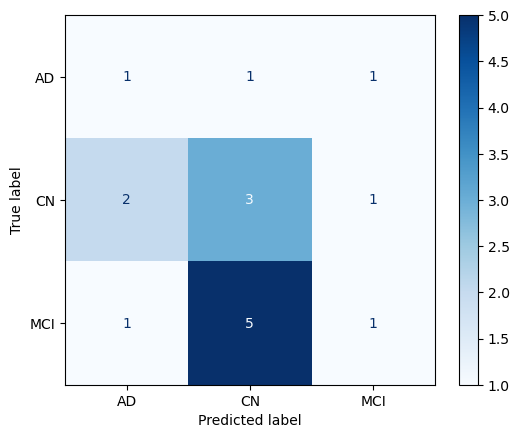

In [61]:
show_confusion_matrix(results["y_test"], results["y_pred"], class_names)

Looking at the confusion matrix, we can see that the model classifies nearly all examples as AD. This might suggest a bias in the training set toward AD patients. However, given that there are 80 examples in the training set and only 40 AD patients in the entire dataset, this seems unlikely. 

Nevertheless, this suggests the model has a heavy bias toward "crying wolf" and classifying everything as AD, which is far from ideal for our purposes. 

---

The **good and righteous readers** of this notebook will remember that when we first started examining the data, we also kept the age and sex of each patient scanned. Let’s add these features to the SVM and see if they help us achieve better results.


In [62]:

# Create a copy of the original DataFrame
df_copy = df.copy()

# Convert sex column values ('M' and 'F') to integers so we can feed it to the SVM
df_copy['Sex'] = df_copy['Sex'].map({'M': 0, 'F': 1})

# Normalize the age column as SVMs are sensitive to the scale of features
scaler = MinMaxScaler()
df_copy['Age'] = scaler.fit_transform(df_copy[['Age']])

# Extract the normalized data
normalized_data = df_copy[['Image Data ID', 'Age', 'Sex']]

# Merge the normalized columns into the extracted_features_with_labels_df
extracted_features_age_sex_with_labels_df = pd.merge(
    extracted_features_with_labels_df, 
    normalized_data, 
    on='Image Data ID', 
    how='left'
)
extracted_features_age_sex_with_labels_df = extracted_features_age_sex_with_labels_df.dropna()
extracted_features_age_sex_with_labels_df.head()


Image Data ID  temporal_roi_1  temporal_roi_2  temporal_roi_3  \
0       I305240        0.513612        0.289242        0.372340   
1       I321520        0.283091        0.188922        0.207827   
2       I273181        0.394408        0.250841        0.536236   
3       I297106        0.337096        0.195635        0.336366   
4       I256148        0.353925        0.213106        0.242669   

   temporal_roi_4  temporal_roi_5  temporal_roi_6  temporal_roi_7  \
0        0.386984        0.247484        0.421727        0.220108   
1        0.330969        0.226755        0.478773        0.352496   
2        0.382406        0.333481        0.548013        0.571067   
3        0.343456        0.256977        0.446735        0.358104   
4        0.278669        0.282958        0.262862        0.297087   

   temporal_roi_8  temporal_roi_9  ...  spatial_roi_3  spatial_roi_4  \
0        0.229111        0.340014  ...       0.370096       0.359406   
1        0.243922        0.400532  ...       0.343524       0.190896   
2        0.318921        0.454734  ...       0.412359       0.334707   
3        0.235647        0.426625  ...       0.466131       0.271398   
4        0.298048        0.472645  ...       0.282700       0.148853   

   spatial_roi_5  spatial_roi_6  spatial_roi_7  spatial_roi_8  spatial_roi_9  \
0       0.359794       0.358208       0.491634       0.270819       0.285045   
1       0.348383       0.384502       0.474297       0.274434       0.288316   
2       0.339832       0.468639       0.388467       0.265470       0.344759   
3       0.408624       0.501107       0.289507       0.257376       0.297824   
4       0.362664       0.301325       0.135322       0.317932       0.238902   

   Group    Age  Sex  
0      2  0.475    0  
1      0  0.425    1  
2      2  0.600    1  
3      0  0.650    1  
4      2  0.600    1  

[5 rows x 22 columns]

<br>

Now, let’s feed the new DataFrame with age and sex included and see if adding these features helps improve the classification matrix.


number of examples in training set : 61
number of examples in testing set : 16
              precision    recall  f1-score   support

          AD       0.00      0.00      0.00         3
          CN       0.40      0.33      0.36         6
         MCI       0.44      0.57      0.50         7

    accuracy                           0.38        16
   macro avg       0.28      0.30      0.29        16
weighted avg       0.34      0.38      0.36        16



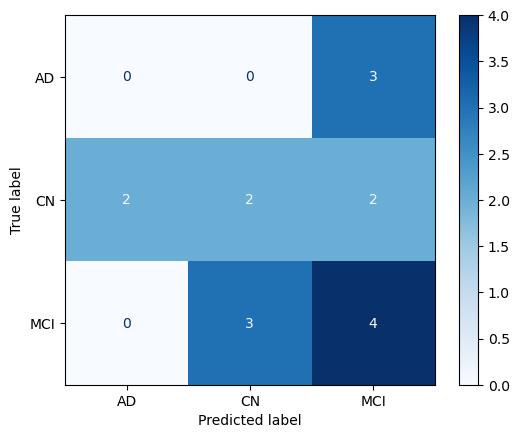

In [63]:
results = train_svm_on_features(extracted_features_age_sex_with_labels_df, class_names)
print(results['classification_report'])
show_confusion_matrix(results["y_test"], results["y_pred"], class_names)

## Analyse Results with Age and Sex Data  

**HUZZA!** After all of our hard work, we are now slightly better than random guessing, with an accuracy of 40%.  

As we can see, this increase in accuracy comes mostly from the greater precision and recall of MCI. Specifically, 80% of predicted MCI cases are actual MCI cases, though we only recognize 50% of all MCI cases. While this is not ideal, it is a massive improvement over the 12% recall from the last model without the age and sex data.  

We can also observe an increase in the precision and recall of AD patients. Overall, the model is better at classifying both MCI and AD patients, not by much, but it’s a start.  

However, not all is sunshine and roses. This increased precision and recall for MCI and AD came at the cost of the precision for CN, which dropped from 25% to 17%.  

Looking at the confusion matrix, the only noteworthy observation is that the model struggles to distinguish between CN and AD. This is odd, as these two groups are farther apart in terms of brain degeneration compared to MCI and AD or CN and MCI. This might suggest that the current model lacks sufficient data to accurately model the feature space.  

---

## A Change in Some Preprocessing  

As you might have noticed, the number of ROIs in the MNI atlas is quite small, with only 9 different ROIs. Let’s see if taking a more granular approach by using an atlas with more ROIs and thus more features will help our classification efforts.  

---

## Using a Different Atlas  

For this, we are going to use the **HarvardOxford-cort-maxprob-thr0-2mm.nii**, which I have conveniently placed in the same folder as the MNI atlas. Do note that both of these files come with the installation of FSL and should already be somewhere in your system if you have installed FSL on your machine.  


In [64]:

extract_all_mean_time_series_with_atlas_mapping(BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR, HARVARD_OXFORD_ATLAS_IMG_PATH,
                                                BASE_HARVARD_OXFORD_ROI_EXTRACTION_DIR)


Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/roi_extraction/1/I305240.csv
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/10/I335306.nii.gz
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/roi_extraction/100/I272535.csv
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/101/I341972.nii.gz
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/11/I398684.nii.gz
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/12/I346237.nii.gz
Error processing file /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/13/I248516.nii.gz
Time series for all ROIs saved to /home/a

['/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/10/I335306.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/101/I341972.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/11/I398684.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/12/I346237.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/13/I248516.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/15/I358424.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/17/I390346.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/2/I340021.nii.gz',
 '/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/outputs/20/I301395.nii.gz',
 '/home/ad

<br>

Now that we have extracted the mean time series data, let's create the DCN.

In [65]:

create_all_DCNs(BASE_HARVARD_OXFORD_ROI_EXTRACTION_DIR, BASE_HARVARD_OXFORD_DCN_DIR )
print("\n\n finished harverd oxford DCN calculateion \n\n" )


Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/DCN/1/I305240.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/DCN/10/I321520.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/DCN/11/I273181.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/DCN/12/I297106.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/normalized/harverd_oxford/DCN/13/I256

<br>

Extracting Temporal and Spatial Features from the DCN same as before 


In [66]:

harverd_oxford_extracted_features_df = extract_temporal_and_spatial_features_from_all(BASE_HARVARD_OXFORD_DCN_DIR)
harverd_oxford_extracted_features_df.head()


Aggregated features from 77 DCNs into a single DataFrame.


Image Data ID  temporal_roi_1  temporal_roi_2  temporal_roi_3  \
0       I305240        0.805283        0.474857        0.635301   
1       I321520        0.518783        0.614038        0.476334   
2       I273181        0.602581        0.737292        0.352471   
3       I297106        0.658288        0.434537        0.648703   
4       I256148        0.627168        0.581753        0.527973   

   temporal_roi_4  temporal_roi_5  temporal_roi_6  temporal_roi_7  \
0        0.611766        0.684098        0.529032        0.584011   
1        0.459075        0.535890        0.571304        0.491172   
2        0.475457        0.651590        0.564856        0.450712   
3        0.571897        0.560991        0.621825        0.554874   
4        0.493049        0.586916        0.554453        0.462648   

   temporal_roi_8  temporal_roi_9  ...  spatial_roi_39  spatial_roi_40  \
0        0.416441        0.548367  ...        0.373960        0.344957   
1        0.569188        0.512016  ...        0.259382        0.411017   
2        0.489046        0.401680  ...        0.287822        0.421072   
3        0.564320        0.501288  ...        0.173580        0.431485   
4        0.618137        0.636402  ...        0.283302        0.279504   

   spatial_roi_41  spatial_roi_42  spatial_roi_43  spatial_roi_44  \
0        0.450001        0.395336        0.389623        0.314178   
1        0.278054        0.207151        0.301370        0.194069   
2        0.425016        0.294167        0.383189        0.263894   
3        0.385165        0.315288        0.258683        0.265607   
4        0.266770        0.355122        0.230328        0.162906   

   spatial_roi_45  spatial_roi_46  spatial_roi_47  spatial_roi_48  
0        0.307226        0.360450        0.509319        0.429309  
1        0.250485        0.249442        0.370840        0.399518  
2        0.220807        0.325021        0.357588        0.439417  
3        0.326559        0.334412        0.326689        0.327458  
4        0.287855        0.306786        0.277647        0.381375  

[5 rows x 97 columns]

<br>

 Adding Labels to the DataFrame

In [67]:

harverd_oxford_extracted_features_with_labels_df = pd.merge(harverd_oxford_extracted_features_df,
                                                            labels, on='Image Data ID', how='left', suffixes=('', ''))
harverd_oxford_extracted_features_with_labels_df = harverd_oxford_extracted_features_with_labels_df.dropna()
harverd_oxford_extracted_features_with_labels_df.head()


Image Data ID  temporal_roi_1  temporal_roi_2  temporal_roi_3  \
0       I305240        0.805283        0.474857        0.635301   
1       I321520        0.518783        0.614038        0.476334   
2       I273181        0.602581        0.737292        0.352471   
3       I297106        0.658288        0.434537        0.648703   
4       I256148        0.627168        0.581753        0.527973   

   temporal_roi_4  temporal_roi_5  temporal_roi_6  temporal_roi_7  \
0        0.611766        0.684098        0.529032        0.584011   
1        0.459075        0.535890        0.571304        0.491172   
2        0.475457        0.651590        0.564856        0.450712   
3        0.571897        0.560991        0.621825        0.554874   
4        0.493049        0.586916        0.554453        0.462648   

   temporal_roi_8  temporal_roi_9  ...  spatial_roi_40  spatial_roi_41  \
0        0.416441        0.548367  ...        0.344957        0.450001   
1        0.569188        0.512016  ...        0.411017        0.278054   
2        0.489046        0.401680  ...        0.421072        0.425016   
3        0.564320        0.501288  ...        0.431485        0.385165   
4        0.618137        0.636402  ...        0.279504        0.266770   

   spatial_roi_42  spatial_roi_43  spatial_roi_44  spatial_roi_45  \
0        0.395336        0.389623        0.314178        0.307226   
1        0.207151        0.301370        0.194069        0.250485   
2        0.294167        0.383189        0.263894        0.220807   
3        0.315288        0.258683        0.265607        0.326559   
4        0.355122        0.230328        0.162906        0.287855   

   spatial_roi_46  spatial_roi_47  spatial_roi_48  Group  
0        0.360450        0.509319        0.429309      2  
1        0.249442        0.370840        0.399518      0  
2        0.325021        0.357588        0.439417      2  
3        0.334412        0.326689        0.327458      0  
4        0.306786        0.277647        0.381375      2  

[5 rows x 98 columns]

<br>
And run through the SVM


number of examples in training set : 61
number of examples in testing set : 16
              precision    recall  f1-score   support

          AD       0.00      0.00      0.00         3
          CN       0.40      0.33      0.36         6
         MCI       0.43      0.43      0.43         7

    accuracy                           0.31        16
   macro avg       0.28      0.25      0.26        16
weighted avg       0.34      0.31      0.32        16



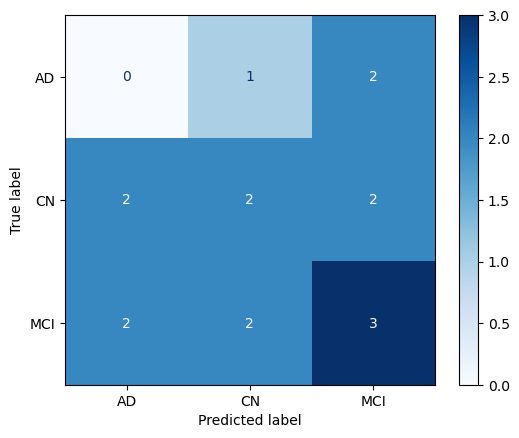

In [68]:
ho_simple_results = train_svm_on_features(harverd_oxford_extracted_features_with_labels_df, class_names)
print(ho_simple_results['classification_report'])
show_confusion_matrix(ho_simple_results["y_test"], ho_simple_results["y_pred"], class_names)

## Now That is Starting to Look Better

This is a big improvement. Just looking at the accuracy, we can already see that we classify more than half the cases correctly! Our precision for each class is 50% or higher, meaning more than half of our predictions are true. Given that there are 3 classes, this puts us 20% better than random chance. 

The only downside of this model is that the recall for MCI has dropped from 50% to 38% compared to our last model. Looking at the confusion matrix, we see great results for CN and AD, but for MCI, it seems the model is simply guessing, as it classifies all classes as MCI at roughly the same ratio.

This might be expected, as MCI is difficult to diagnose, being a state between healthy aging and AD. Adding to this, the ground truth of this database is based on expert opinions, meaning the actual diagnosis (whether a patient truly has MCI) might clash with the classification provided in the dataset.

### Let's Try Adding Age and Sex to the Harvard-Oxford Dataframe


number of examples in training set : 61
number of examples in testing set : 16
              precision    recall  f1-score   support

          AD       0.00      0.00      0.00         3
          CN       0.33      0.17      0.22         6
         MCI       0.56      0.71      0.62         7

    accuracy                           0.38        16
   macro avg       0.30      0.29      0.28        16
weighted avg       0.37      0.38      0.36        16



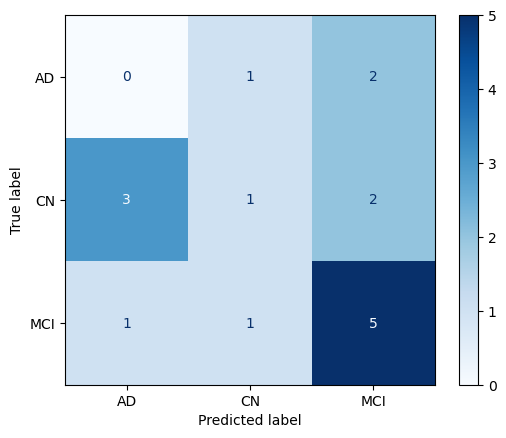

In [69]:
# Merge the normalized columns into the extracted_features_with_labels_df
harverd_oxford_extracted_features_with_age_sex_labels_df = pd.merge(
    harverd_oxford_extracted_features_with_labels_df, 
    normalized_data, 
    on='Image Data ID', 
    how='left'
)
harverd_oxford_extracted_features_with_age_sex_labels_df = harverd_oxford_extracted_features_with_age_sex_labels_df.dropna()
ho_age_sex_results = train_svm_on_features(harverd_oxford_extracted_features_with_age_sex_labels_df, class_names)

print(ho_age_sex_results['classification_report'])
show_confusion_matrix(ho_age_sex_results["y_test"], ho_age_sex_results["y_pred"], class_names)

## Improvement Yet Again

Looking at the accuracy of 60%, we can see that we correctly classify 60% of all cases. Interestingly, we have the same recall as before for the AD and CN classes, while showing an increase in recall for MCI.

A noteworthy statistic is the precision for MCI, which is 100%, meaning all examples the model classifies as MCI are truly MCI. As we can see from the confusion matrix, the model classified 4 out of 8 examples as MCI, which is an impressive precision.

Unfortunately, we seem to have lost some precision between the AD and CN classes, indicating that the model now finds it a bit harder to distinguish between CN and AD, which is somewhat unexpected.


### Managing Data Storage for Exploration

Now that we've made good progress, it's time to pause and assess the size of our data. 


In [70]:

def print_folder_size(folder_path):
    # Walk through the folder and add the size of each file
    
    total_size = 0

    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            total_size += os.path.getsize(filepath)
    total_size_gb = total_size / (1024 * 1024 * 1024)
    print(f"Total size of DATA : {total_size_gb:.2f} GB")

data_path = os.path.abspath("./DATA/")
print_folder_size(data_path)


Total size of DATA : 38.34 GB


That’s a huge chunk of space we’re dealing with here. And, having written this notebook, I already know where we’re headed. With the incredible power of foresight, I can confidently tell you that we won’t need all the data we’ve saved from those middle steps.

It’s time to clear some space by deleting the things we won’t use again. This includes:  
- The **nii** folder, created when transforming raw DCIX files into NIfTI files.  
- The **brain-extracted** files, which are now redundant since we’ve got the realigned files.  
- The **normalized brain images**, including the **registered_mean** files and **affine matrices** created during the process.  

This will help us stay focused and keep things tidy. It’s all about saving space and staying organized for the next steps. And, to be perfectly honest, without this cleanup, I can’t continue processing the data as my poor little machine has run out of memory. 

Once we’ve cleared out these folders, we’ll be free to move forward, exploring and improving the classification process.


In [71]:

def delete_folder_contents(folder_path):
    """
    Recursively deletes all files and subdirectories inside the specified folder.
    """
    for dirpath, dirnames, filenames in os.walk(folder_path, topdown=False):
        
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            os.remove(file_path)
        
        for dirname in dirnames:
            dir_path = os.path.join(dirpath, dirname)
            os.rmdir(dir_path)



In [72]:

# Delte unnecssary folders 
delete_folder_contents(NII_BASE_DIR)
delete_folder_contents(BET_BASE_DIR)
delete_folder_contents(BASE_PIPELINE_NORMALIZED_OUTPUTS_DIR)
delete_folder_contents(BASE_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR)
delete_folder_contents(BASE_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR)

# Check size after removing unneades files 
print("size of the data after cleaning ")
data_path = os.path.abspath("./DATA/")
print_folder_size(data_path)

size of the data after cleaning 
Total size of DATA : 13.93 GB


# Onwards to Motion Correction

Another way to improve classification is by adding motion correction to the pipeline.

After completing realignment, some noise is introduced into the data. We can attempt to filter out this noise using motion correction. These spatially aware algorithms use the data generated during realignment to correct for any noise introduced in the process. For example, if a white matter area is shifted onto a gray matter area, it causes a signal boost due to the different amounts of blood in white and gray matter. Motion correction helps mitigate some of this noise.

Since our realignment used only rigid body parameters, we will apply motion correction using 6 rigid body parameters (3 translational and 3 rotational).


In [73]:

def setup_motion_correction_node(nii_file_path, par_file_path, out_file_path, index):
    """
    Set up a motion correction node for a given .nii.gz and .par file.
    """

    motion_correction = Node(FilterRegressor(), name=f"motion_correction_{index}")
    motion_correction.inputs.in_file = nii_file_path
    motion_correction.inputs.design_file = par_file_path
    # Columns to filter rigid body motion ( 3D transformation and rotation ) caused by realignment
    motion_correction.inputs.filter_columns = [1, 2, 3, 4, 5, 6]
    motion_correction.inputs.out_file = out_file_path

    return motion_correction


def perform_motion_correction(in_base_dir, output_dir):

    # get a list of input files and output files with abs path
    in_nii_files = get_files_list(in_base_dir, "", ".nii.gz")
    in_par_files = get_files_list(in_base_dir, "", ".par")
    mc_out_paths = create_output_paths(in_nii_files, output_dir, ".nii.gz")

    mc_nodes = []

    for i in range(len(in_nii_files)):
        nii_file = in_nii_files[i]
        par_file = in_par_files[i]
        out_file = mc_out_paths[i]

        mc_node = setup_motion_correction_node(nii_file, par_file, out_file, str(i))
        mc_nodes.append(mc_node)

    wf = create_workflow("MC", mc_nodes)
    # Run the workflow with MultiProc plugin
    wf.run(plugin=PLUGIN, plugin_args=PLUGIN_ARGS)
    print("\n\nMotion Correction Completed!\n\n")



In [74]:


perform_motion_correction(REALIGN_BASE_DIR, MC_PIPELINE_MC_DIR)



250124-20:06:21,582 nipype.workflow INFO:
	 Workflow MC settings: ['check', 'execution', 'logging', 'monitoring']
250124-20:06:21,623 nipype.workflow INFO:
	 Running in parallel.
250124-20:06:21,629 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 101 jobs ready. Free memory (GB): 13.67/13.67, Free processors: 8/8.
250124-20:06:21,920 nipype.workflow INFO:
	 [Node] Setting-up "MC.motion_correction_0" in "/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/workflows/MC/motion_correction_0".
250124-20:06:21,920 nipype.workflow INFO:
	 [Node] Setting-up "MC.motion_correction_4" in "/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/workflows/MC/motion_correction_4".
250124-20:06:21,920 nipype.workflow INFO:
	 [Node] Setting-up "MC.motion_correction_5" in "/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/workflows/MC/motion_correction_5".
250124-20:06:21,920 nipype.workflow INFO:
	 [Node] Setting-up "MC.motion_correction_3" in "/home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/workflows/

As this notebook has gone on long enough and the steps from this point forward are the same as before, we’ll go through them quickly without any additional explanation, as they’ve already been covered above.

Here’s what we’re going to do next:

- Remove the realigned data.  
- Normalize the motion-corrected data.  
- Map the normalized data to the MNI and Harvard-Oxford atlases and extract mean ROI time series.  
- Create a DCN from the mean ROI time series data.  
- Perform feature extraction.  
- Add labels and train an SVM.  
- Add sex and age columns and train an SVM.  
- Analyze the results.  


In [75]:
# Remove the realigned data.

delete_folder_contents(REALIGN_BASE_DIR)



In [76]:
# Normalize the motion-corrected data.

num_processes = os.cpu_count() - 2
normalize(
    MC_PIPELINE_MC_DIR,
    MC_PIPELINE_NORMALIZED_MEAN_IMAGES_DIR,
    MC_PIPELINE_NORMALIZED_AFFINE_MATRICES_DIR,
    MC_PIPELINE_NORMALIZED_REGISTERED_MEAN_DIR,
    MC_PIPELINE_NORMALIZED_OUTPUTS_DIR,
    num_processes = num_processes  
)


Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/mean_images/100/I272535.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/mean_images/12/I287992.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/mean_images/101/I322347.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/mean_images/10/I272411.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/mean_images/1/I305240.nii.gz
Mean image created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/mean_images/11/I390346.nii.gz
Transformation matrix created: /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/normalized/affine_matrices/10/I272411.nii.gz
Registered mean image created: /home/adi/Desktop/keep

In [77]:


# MNI atlas
mc_MNI_failed_files = extract_all_mean_time_series_with_atlas_mapping(MC_PIPELINE_NORMALIZED_OUTPUTS_DIR, MNI_ATLAS_IMG_PATH,
                                                MC_MNI_ROI_EXTRACTION_DIR)

# Harverd-oxford atlas
mc_harverd_oxford_failed_files = extract_all_mean_time_series_with_atlas_mapping(MC_PIPELINE_NORMALIZED_OUTPUTS_DIR, HARVARD_OXFORD_ATLAS_IMG_PATH,
                                                MC_HARVARD_OXFORD_ROI_EXTRACTION_DIR)

print(f" failed to extract mean time series from {len(mc_MNI_failed_files) } for MNI atalas ")
print(f" failed to extract mean time series from {len(mc_harverd_oxford_failed_files) } for harverd-oxford atalas ")


Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/1/I305240.csv
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/10/I251176.csv
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/100/I396530.csv
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/101/I343571.csv
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/11/I385942.csv
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/12/I213885.csv
Time series for all ROIs saved to /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/roi_extraction/13/I180734.csv
Time series for all

In [78]:
# Create a DCN from the mean ROI time series data.

create_all_DCNs(MC_MNI_ROI_EXTRACTION_DIR, MC_MNI_DCN_DIR )
create_all_DCNs(MC_HARVARD_OXFORD_ROI_EXTRACTION_DIR, MC_HARVARD_OXFORD_DCN_DIR )

print("created DCNS ")


Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/DCN/1/I305240.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/DCN/10/I247209.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/DCN/100/I415205.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/DCN/101/I227595.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved as /home/adi/Desktop/keep/code/git/reops/ANDI/ANDI-/DATA/pipelines/base/mc/mni/DCN/11/I381524.npy.
Divided time series into 7 windows of size 20
Created DCN with 7 windows.
DCN saved 

In [79]:
# Perform feature extraction.

mc_MNI_extracted_features_df = extract_temporal_and_spatial_features_from_all(MC_MNI_DCN_DIR)

mc_harverd_oxford_extracted_features_df = extract_temporal_and_spatial_features_from_all(MC_HARVARD_OXFORD_DCN_DIR)
print("\n\n finished feature extraction ")

Aggregated features from 101 DCNs into a single DataFrame.
Aggregated features from 101 DCNs into a single DataFrame.


 finished feature extraction 


In [80]:
# Add labels and train an SVM.
# MNI
mc_MNI_extracted_features_with_labels_df = pd.merge(mc_MNI_extracted_features_df,
                                                            labels, on='Image Data ID', how='left', suffixes=('', ''))
mc_MNI_extracted_features_with_labels_df = mc_MNI_extracted_features_with_labels_df.dropna()

# harverd_oxford
mc_harverd_oxford_extracted_features_with_labels_df = pd.merge(mc_harverd_oxford_extracted_features_df,
                                                            labels, on='Image Data ID', how='left', suffixes=('', ''))
mc_harverd_oxford_extracted_features_with_labels_df = mc_harverd_oxford_extracted_features_with_labels_df.dropna()


mc_MNI_results = train_svm_on_features(mc_MNI_extracted_features_with_labels_df, class_names)
mc_ho_results = train_svm_on_features(mc_harverd_oxford_extracted_features_with_labels_df, class_names)

print("added labels and trained SVMs")


number of examples in training set : 80
number of examples in testing set : 20
number of examples in training set : 80
number of examples in testing set : 20
added labels and trained SVMs


              precision    recall  f1-score   support

          AD       0.29      0.40      0.33         5
          CN       0.20      0.17      0.18         6
         MCI       0.38      0.33      0.35         9

    accuracy                           0.30        20
   macro avg       0.29      0.30      0.29        20
weighted avg       0.30      0.30      0.30        20



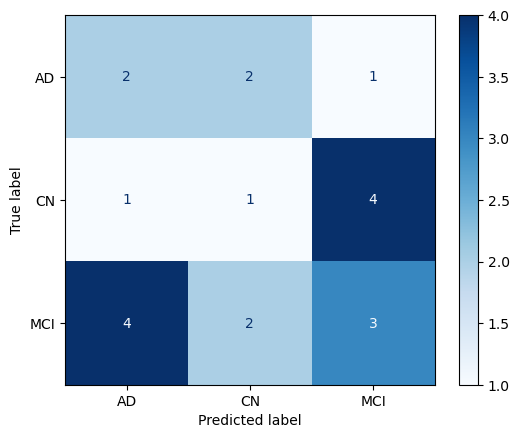

In [81]:

print(mc_MNI_results['classification_report'])
show_confusion_matrix(mc_MNI_results["y_test"], mc_MNI_results["y_pred"], class_names)

# Motion corrected MNI atlas Results

After all we have been through, it's easy to see at a glance that this is a worse result than almost everything we've done so far. We're back at 30% accuracy, which is worse than a coin toss. The accuracy, recall, and F1 scores are all 40% and below, leaving little to discuss except that using only motion correction with our MNI atlas doesn't offer much improvement over our initial model, which used non-motion corrected data with all else being equal.


              precision    recall  f1-score   support

          AD       0.00      0.00      0.00         5
          CN       0.17      0.17      0.17         6
         MCI       0.36      0.44      0.40         9

    accuracy                           0.25        20
   macro avg       0.18      0.20      0.19        20
weighted avg       0.21      0.25      0.23        20



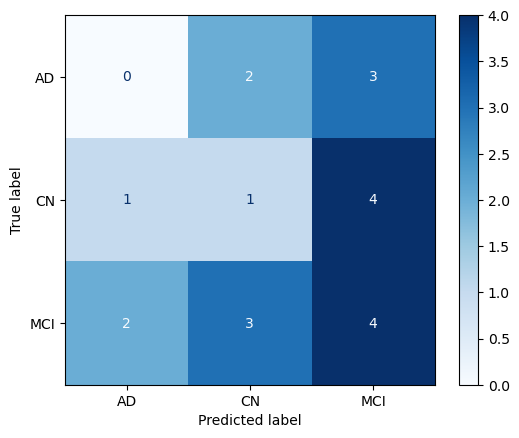

In [82]:

print(mc_ho_results['classification_report'])
show_confusion_matrix(mc_ho_results["y_test"], mc_ho_results["y_pred"], class_names)

# Motion Corrected HO Atlas Results

Somehow, this is even worse. These are the worst results we have obtained so far. Looking at the confusion matrix, it seems that the model mostly guesses MCI regardless of the input data, hoping to get something right.

A particularly noteworthy result is the 0% precision and 0% accuracy for AD in this model.

This outcome suggests that, so far, motion correction not only fails to improve the results but actively worsens them. Either that, or the motion correction was not performed correctly, introducing more noise into the data rather than removing it.


In [83]:
# Add sex and age columns and train an SVM.
# Merge the normalized columns into the extracted_features_with_labels_df
mc_harverd_oxford_extracted_features_with_age_sex_labels_df = pd.merge(
    mc_harverd_oxford_extracted_features_with_labels_df, 
    normalized_data, 
    on='Image Data ID', 
    how='left'
)
mc_harverd_oxford_extracted_features_with_age_sex_labels_df = mc_harverd_oxford_extracted_features_with_age_sex_labels_df.dropna()
mc_ho_age_sex_results = train_svm_on_features(mc_harverd_oxford_extracted_features_with_age_sex_labels_df, class_names)

# Merge the normalized columns into the extracted_features_with_labels_df
mc_mni_extracted_features_with_age_sex_labels_df = pd.merge(
    mc_MNI_extracted_features_with_labels_df, 
    normalized_data, 
    on='Image Data ID', 
    how='left'
)
mc_mni_extracted_features_with_age_sex_labels_df = mc_mni_extracted_features_with_age_sex_labels_df.dropna()
mc_mni_age_sex_results = train_svm_on_features(mc_mni_extracted_features_with_age_sex_labels_df, class_names)

number of examples in training set : 80
number of examples in testing set : 20
number of examples in training set : 80
number of examples in testing set : 20


              precision    recall  f1-score   support

          AD       0.50      0.20      0.29         5
          CN       0.20      0.17      0.18         6
         MCI       0.46      0.67      0.55         9

    accuracy                           0.40        20
   macro avg       0.39      0.34      0.34        20
weighted avg       0.39      0.40      0.37        20



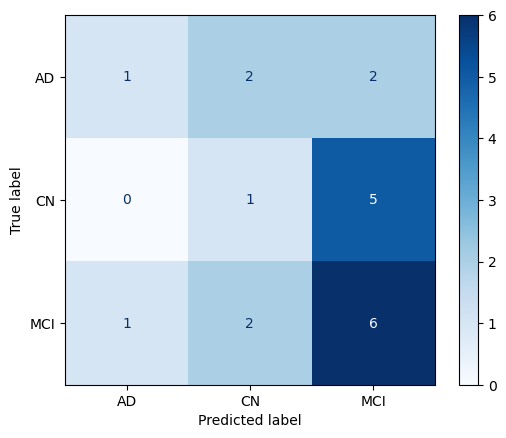

In [84]:
print(mc_mni_age_sex_results['classification_report'])
show_confusion_matrix(mc_mni_age_sex_results["y_test"], mc_mni_age_sex_results["y_pred"], class_names)

## Motion Correction with MNI Atlas, Age, and Sex Data

This is a bit better, but still not our best result. We can already tell that adding age and sex data improves classification. However, the model continues to classify most examples as MCI. Notably, from a look at the confusion matrix, we can see an improvement in classifying 6 out of the 9 MCI examples in the testing dataset accurately. 

Unfortunately, it also classifies 5 of the CN examples as MCI. Most examples in the testing set are predicted to be MCI, whether they are or not, resulting in low overall accuracy and poor precision and recall for all other classes.


              precision    recall  f1-score   support

          AD       0.00      0.00      0.00         5
          CN       0.17      0.17      0.17         6
         MCI       0.45      0.56      0.50         9

    accuracy                           0.30        20
   macro avg       0.21      0.24      0.22        20
weighted avg       0.25      0.30      0.28        20



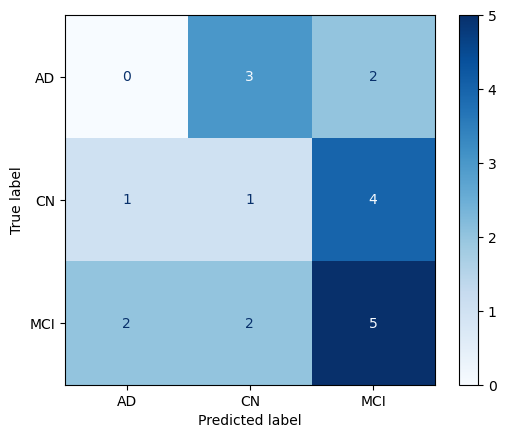

In [85]:
print(mc_ho_age_sex_results['classification_report'])
show_confusion_matrix(mc_ho_age_sex_results["y_test"], mc_ho_age_sex_results["y_pred"], class_names)

# Motion Corrected HO Atlas Results with Age and Sex Data

This result looks similar to the Motion Corrected HO Atlas Results without age and sex data, so I won’t discuss the specifics already covered there. However, it seems that adding age and sex data here did not make much of a difference. 

It is interesting to note that, unlike other models, we do not see a measurable improvement in performance metrics when age and sex data are added. In other models, whether with or without motion correction, adding age and sex data typically led to improvements across all metrics.


# Summary

To wrap everything up neatly, let’s go through all we’ve done in this notebook.

First, we looked at the CSV files that come with each collection of data (e.g., MCI_FEMALE, CN_MALE, etc.). We cleaned the data by removing uninformative columns, checking the validity of the remaining values, and modifying them where necessary (e.g., converting the groups LMCI and EMCI to MCI). Finally, we decided to remove all scans taken from the same person on the same day, as we believed they added no new information about the progression of the disease and might introduce bias into the data.

Next, we converted all the raw DICOM files we obtained from ADNI into the NIfTI format, which is easier to work with. (We only worked on the files whose IDs remained in the cleaned CSV after removing duplicate scans.) We began by examining the fMRI scans to observe the noise caused by the skull, performed brain extraction, and visually compared the spatial data before and after the process.

We then explored the temporal dimension of the fMRI scans and noticed patient movement in the scanner. This movement distorted the assumption that each voxel in the fMRI image represents the activity of the same brain region over time. To address this, we performed realignment, returned to visually inspect the results, and confirmed that the movement was corrected.

From there, we continued preprocessing the data to prepare it for use with an SVM. This included:

- Normalizing the 4D data into an MNI-normalized brain template.  
- Mapping the normalized 4D data to an atlas and extracting the mean time series for each ROI.  
- Creating a Dynamic Connectivity Network (DCN) to understand the relationships between brain regions.  
- Extracting temporal and spatial features from the DCN.  
- Attaching the extracted feature vector to a label from the cleaned CSV prepared earlier in this notebook.  

Once preprocessing was complete, we fed the data into an SVM and analyzed the results. (A detailed discussion of all the results from the various pipelines will follow at the end of this section.)

After completing the basic preprocessing, we attempted to improve the results through various methods, including:

- Adding age and sex data.  
- Using a different atlas with more ROIs (the Harvard-Oxford atlas).  
- Combining the Harvard-Oxford atlas with age and sex data.  
- Performing motion correction and retrying all the above options to see if motion correction improves performance.  

Throughout this process, we generated a significant amount of intermediate data, which eventually cluttered my computer so much that I couldn’t proceed without removing it. This led to a fun little side quest where I dealt with and removed unnecessary data.

In the end, our initial preprocessing with the MNI atlas (without age, sex data, or motion correction) achieved an accuracy of 30% which is worse then random guessing, looking at the confusion matrix we saw the model classifies most examples as AD.
Afterward, we observed that adding age and sex data improved the SVM results accuracy of 40% while noteabbliy the recall for MCI was unbussaly high at 80% still the model mostly classifies all examples as AD. Using the Harvard-Oxford atlas further improved performance to a 55% accuracy with simmilar precision for all classes the model now only confuses when clasisfing MCI examples adding age and sex to the HO model we reached our highest accuracy of 60% with noteable 100% precision and 50% recall or MCI  meaning when the model classified an example as MCI it wass allways correct thou it missed half the cases of MCI in the test set. However, motion correction consistently yielded the worst results. Regardless of the changes made (e.g., switching atlases or adding age and sex data), we couldn’t improve the motion-corrected results much beyond random guessing reaching a top accuracy of 40% which is why it does not marrit an in deapth dicsussion of thesee results.

Since motion correction is a common step in fMRI preprocessing, I suspect the poor results were due to a mistake on my part. Despite multiple attempts to fix the issue, I could not identify the problem.

In the end, the best accuracy we achieved was 60%. While not terrible for a classification task with three classes, a large data space, and noisy fMRI data, it falls short of our original goal of creating a tool to assist in diagnosing Alzheimer’s and MCI early enough to allow timely intervention. After all, who would trust a machine that is only correct 60% of the time? Moreover, the original study we based this work on achieved an accuracy of 78%, which highlights the gap between our implementation and theirs.

# Personal Experience

I would love to say this whole experience was wonderful, but to be honest, while the subject of processing fMRI and 4D data is fascinating to me, the actual implementation was a pain. Learning about the various algorithms (e.g., motion correction, brain extraction, slice timing correction) and the biology of Alzheimer’s and fMRI was exciting. However, working with neuroimaging libraries was a frustrating experience. The documentation for these libraries is often lacking, confusing, or outright incorrect. 

There are very few resources available to help understand how to work with this data or these libraries. The closest I found was a GitHub repository with Jupyter notebooks from 11 years ago, which are now outdated and require, for some reason, a 2010 MATLAB compiler.

I believe the challenging state of these neuroimaging libraries is one major reason why researchers often stick to premade pipelines and rarely try to improve them. The headaches caused by these tools made this project less enjoyable, and I’m personally glad to be done with it. 

That being said, I don’t hold this against the course itself. It was my choice to work with neuroimaging data and put myself in this mess. The idea of tackling a real-world problem and trying to solve it is fantastic. I think this project would have been more enjoyable if I had chosen an easier problem to tackle.
